# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.colors as colors
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Activation
from scikeras.wrappers import KerasClassifier

# Import Dataset

In [248]:
x_UnNor_RF_rfecv = pd.read_csv('x_UnNor_RF_rfecv.csv')
x_UnNor_svr_rfecv = pd.read_csv('x_UnNor_svr_rfecv.csv')
x_UnNor_mutual_info = pd.read_csv('x_UnNor_mutual_info.csv')
x_UnNor_sfs_svr = pd.read_csv('x_UnNor_sfs_svr_SFS.csv')
x_UnNor_sfs_KNN = pd.read_csv('x_UnNor_sfs_KNN_SFS.csv')
x_UnNor_rf_feature_impor = pd.read_csv('x_UnNor_rf_feature_impor.csv')
X_UnNor = pd.read_csv('X_UnNor.csv')

x_RF_rfecv = x_UnNor_RF_rfecv.copy()
x_svr_rfecv = x_UnNor_svr_rfecv.copy()
x_sfs_svr = x_UnNor_sfs_svr.copy()
x_sfs_KNN = x_UnNor_sfs_KNN.copy()
x_mutual_info = x_UnNor_mutual_info.copy()
x_rf_feature_impor = x_UnNor_rf_feature_impor.copy()
X = X_UnNor.copy()

y = pd.read_csv('y_UnNor.csv')


In [249]:
print('Number of feature in mutual information method: %s \n' % len(x_UnNor_mutual_info.columns))
print('Number of feature in random forest features importance method: %s \n' % len(x_UnNor_rf_feature_impor.columns))
print('Number of feature in svr Sequential Feature Selector method: %s \n' % len(x_UnNor_sfs_svr.columns))
print('Number of feature in KNN Sequential Feature Selector method: %s \n' % len(x_UnNor_sfs_KNN.columns))
print('Number of feature in svr RECURSIVE FEATURE ELIMINATION method: %s \n' % len(x_UnNor_svr_rfecv.columns))
print('Number of feature in random forest RECURSIVE FEATURE ELIMINATION method: %s \n' % len(x_UnNor_RF_rfecv.columns))

Number of feature in mutual information method: 8 

Number of feature in random forest features importance method: 8 

Number of feature in svr Sequential Feature Selector method: 6 

Number of feature in KNN Sequential Feature Selector method: 7 

Number of feature in svr RECURSIVE FEATURE ELIMINATION method: 1 

Number of feature in random forest RECURSIVE FEATURE ELIMINATION method: 6 



In [250]:
print('selected features by mutual information method:\n %s \n' % x_UnNor_mutual_info.columns)
print('selected features by random forest features importance method:\n %s \n' % x_UnNor_rf_feature_impor.columns)
print('selected features by svr Sequential Feature Selector method:\n %s \n' % x_UnNor_sfs_svr.columns)
print('selected features by KNN Sequential Feature Selector method:\n %s \n' % x_UnNor_sfs_KNN.columns)
print('selected features by svr RECURSIVE FEATURE ELIMINATION method:\n %s \n' % x_UnNor_svr_rfecv.columns)
print('selected features by random forest RECURSIVE FEATURE ELIMINATION method:\n %s \n' % x_UnNor_RF_rfecv.columns)

selected features by mutual information method:
 Index(['Sex', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Pclass_1', 'Pclass_3',
       'Transformed_Age', 'Transformed_Fare'],
      dtype='object') 

selected features by random forest features importance method:
 Index(['Sex', 'FamilySize', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Pclass_3',
       'Transformed_Age', 'Transformed_Fare'],
      dtype='object') 

selected features by svr Sequential Feature Selector method:
 Index(['Sex', 'FamilySize', 'Embarked_C', 'Title_Master', 'Title_Mrs',
       'Pclass_3'],
      dtype='object') 

selected features by KNN Sequential Feature Selector method:
 Index(['Sex', 'Embarked_Q', 'Title_Mrs', 'Pclass_1', 'Pclass_2',
       'Transformed_Age', 'Transformed_Fare'],
      dtype='object') 

selected features by svr RECURSIVE FEATURE ELIMINATION method:
 Index(['Sex'], dtype='object') 

selected features by random forest RECURSIVE FEATURE ELIMINATION method:
 Index(['Sex', 'FamilySize', 'Title_Mr', 'Ti

In [251]:
X.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
0,1,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.63,2.44
1,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,19.87,6.80
2,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,14.53,2.58
3,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.58,6.12
4,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,18.58,2.60


In [252]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


<Axes: xlabel='Survived', ylabel='count'>

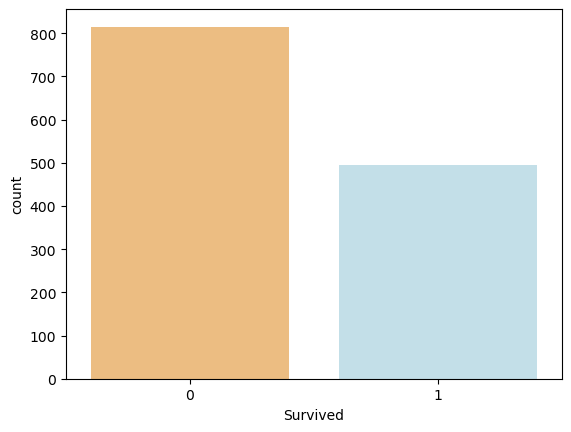

In [253]:
sns.countplot(x='Survived', hue='Survived', legend=False, data=y, palette='RdYlBu')

# Train Test Split

In [ ]:
StKFold = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

y = column_or_1d(y, warn=False)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size= 0.3, shuffle=True)
x_train_svr_rfecv, x_test_svr_rfecv, y_train_svr_rfecv, y_test_svr_rfecv = train_test_split(x_svr_rfecv, y, random_state = 50, test_size= 0.3, shuffle=True)
x_train_sfs_svr, x_test_sfs_svr, y_train_sfs_svr, y_test_sfs_svr = train_test_split(x_sfs_svr, y, random_state = 50, test_size= 0.3, shuffle=True)
x_train_rf_feature_impor, x_test_rf_feature_impor, y_train_rf_feature_impor, y_test_rf_feature_impor = train_test_split(x_rf_feature_impor, y, random_state = 50, test_size= 0.3, shuffle=True)


In [255]:
print(f'Number of train data : {x_train_svr_rfecv.shape[0]}')
print(f'Number of test data : {x_test_svr_rfecv.shape[0]}')
print(f'Number of random forest features importance Features : {x_train_rf_feature_impor.shape[1]}')
print(f'Number of SFS SVR Features : {x_train_sfs_svr.shape[1]}')
print(f'Number of svr RECURSIVE FEATURE ELIMINATION Features : {x_train_svr_rfecv.shape[1]}')
print(f'Number of Original data (X) Features : {X.shape[1]}')

Number of train data : 916
Number of test data : 393
Number of random forest features importance Features : 8
Number of SFS SVR Features : 6
Number of svr RECURSIVE FEATURE ELIMINATION Features : 1
Number of Original data (X) Features : 15


[Text(0.5, 1.0, 'Train Data')]

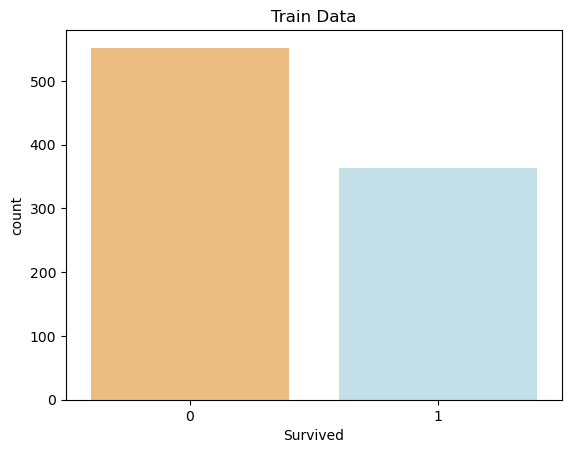

In [256]:
sns.countplot(x='Survived', hue='Survived', legend=False, data=pd.DataFrame(y_train_svr_rfecv,columns=['Survived']), palette='RdYlBu').set(title='Train Data')

[Text(0.5, 1.0, 'Test Data')]

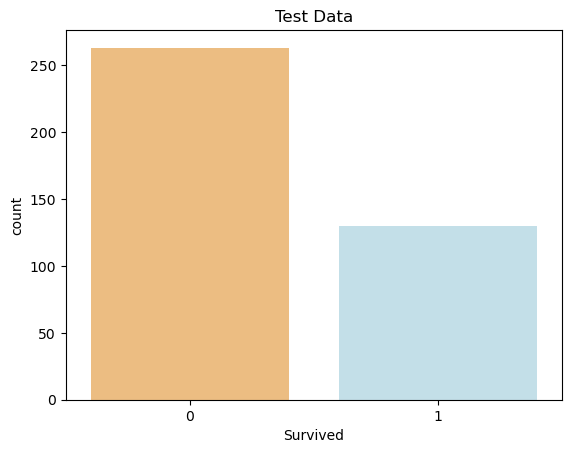

In [257]:
sns.countplot(x='Survived', hue='Survived', legend=False, data=pd.DataFrame(y_test_svr_rfecv,columns=['Survived']), palette='RdYlBu').set(title='Test Data')

# Normalization

In [258]:
x_train_UnNor_svr_rfecv = x_train_svr_rfecv.copy()
x_test_UnNor_svr_rfecv = x_test_svr_rfecv.copy()
x_train_UnNor_sfs_svr = x_train_sfs_svr.copy()
x_test_UnNor_sfs_svr = x_test_sfs_svr.copy()
x_train_UnNor_rf_feature_impor = x_train_rf_feature_impor.copy()
x_test_UnNor_rf_feature_impor = x_test_rf_feature_impor.copy()
x_train_UnNor = x_train.copy()
x_test_UnNor = x_test.copy()

minmaxscale = MinMaxScaler()
minmaxscale.fit(x_train_sfs_svr[['FamilySize']])
x_train_sfs_svr[['FamilySize']] = minmaxscale.transform(x_train_sfs_svr[['FamilySize']])
x_test_sfs_svr[['FamilySize']] = minmaxscale.transform(x_test_sfs_svr[['FamilySize']])

minmaxscale.fit(x_train_rf_feature_impor[['Transformed_Age','Transformed_Fare','FamilySize']])
x_train_rf_feature_impor[['Transformed_Age','Transformed_Fare','FamilySize']] = minmaxscale.transform(x_train_rf_feature_impor[['Transformed_Age','Transformed_Fare','FamilySize']])
x_test_rf_feature_impor[['Transformed_Age','Transformed_Fare','FamilySize']] = minmaxscale.transform(x_test_rf_feature_impor[['Transformed_Age','Transformed_Fare','FamilySize']])

minmaxscale.fit(x_train[['Transformed_Age','Transformed_Fare','FamilySize']])
x_train[['Transformed_Age','Transformed_Fare','FamilySize']] = minmaxscale.transform(x_train[['Transformed_Age','Transformed_Fare','FamilySize']])
x_test[['Transformed_Age','Transformed_Fare','FamilySize']] = minmaxscale.transform(x_test[['Transformed_Age','Transformed_Fare','FamilySize']])


In [259]:
x_train_sfs_svr.head()

,Sex,FamilySize,Embarked_C,Title_Master,Title_Mrs,Pclass_3
873,1,0.0,0.0,0.0,0.0,1.0
246,0,0.0,0.0,0.0,0.0,1.0
1032,0,0.0,0.0,0.0,0.0,0.0
1216,1,0.0,0.0,0.0,0.0,1.0
350,1,0.0,0.0,0.0,0.0,1.0


In [260]:
x_train_UnNor_sfs_svr.head()

,Sex,FamilySize,Embarked_C,Title_Master,Title_Mrs,Pclass_3
873,1,1,0.0,0.0,0.0,1.0
246,0,1,0.0,0.0,0.0,1.0
1032,0,1,0.0,0.0,0.0,0.0
1216,1,1,0.0,0.0,0.0,1.0
350,1,1,0.0,0.0,0.0,1.0


In [261]:
x_train_rf_feature_impor.head()

,Sex,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Pclass_3,Transformed_Age,Transformed_Fare
873,1,0.0,0.0,1.0,0.0,1.0,0.662446,0.413134
246,0,0.0,1.0,0.0,0.0,1.0,0.404903,0.400000
1032,0,0.0,1.0,0.0,0.0,0.0,0.502963,0.770149
1216,1,0.0,0.0,1.0,0.0,1.0,0.379310,0.391045
350,1,0.0,0.0,1.0,0.0,1.0,0.379310,0.415522


In [262]:
x_train_UnNor_rf_feature_impor.head()

,Sex,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Pclass_3,Transformed_Age,Transformed_Fare
873,1,1,0.0,1.0,0.0,1.0,23.62,2.77
246,0,1,1.0,0.0,0.0,1.0,14.06,2.55
1032,0,1,1.0,0.0,0.0,0.0,17.70,8.75
1216,1,1,0.0,1.0,0.0,1.0,13.11,2.40
350,1,1,0.0,1.0,0.0,1.0,13.11,2.81


In [263]:
x_train.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
873,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.662446,0.413134
246,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.404903,0.400000
1032,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.502963,0.770149
1216,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.379310,0.391045
350,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.379310,0.415522


In [264]:
x_train_UnNor.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
873,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,23.62,2.77
246,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,14.06,2.55
1032,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,17.70,8.75
1216,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.11,2.40
350,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,13.11,2.81


# Logistic Regression

In [265]:
poly = PolynomialFeatures(interaction_only=False)
LogisticRegression_model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=250)
pipe_PF_LR = Pipeline(steps=[("poly", poly), ("logisticR", LogisticRegression_model)])


polynomial_degree = [1,2,3,4]
lr_c = [5*10**-3, 10**-2, 5*10**-2, 10**-1, 5*10**-1, 1.0]

param_grid = {
    "poly__degree": polynomial_degree,
    "logisticR__C": lr_c,
}

#### Random Forest Feature Importance

In [266]:
LR_Optimize_RF_FI = GridSearchCV(pipe_PF_LR , param_grid  , cv=StKFold , return_train_score = True , verbose = 3, scoring='f1')
LR_Optimize_RF_FI.fit(x_train_rf_feature_impor,y_train_rf_feature_impor)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 1/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.806, test=0.783) total time=   0.0s
[CV 3/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.788, test=0.838) total time=   0.0s
[CV 4/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.802, test=0.795) total time=   0.0s
[CV 1/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.806, test=0.783) total time=   0.0s
[CV 3/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.788, test=0.838) total time=   0.0s
[CV 4/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.802, test=0.795) total time=   0.0s
[CV 1/4] END logisticR__C=0.005, poly__degree=3;, score=(train=0.810, test=0.793) total time=   0.0s
[CV 2/4] END logisticR__C=0.00

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('logisticR',
                                        LogisticRegression(max_iter=250))]),
             param_grid={'logisticR__C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'poly__degree': [1, 2, 3, 4]},
             return_train_score=True, scoring='f1', verbose=3)

In [267]:
LR_results_RF_FI = pd.DataFrame(LR_Optimize_RF_FI.cv_results_)
LR_results_RF_FI.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticR__C,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.009295,0.004138,0.003905,0.000727,0.005,1,"{'logisticR__C': 0.005, 'poly__degree': 1}",0.784091,0.783133,0.837989,0.795455,0.800167,0.022368,21,0.806142,0.806026,0.787645,0.802303,0.800529,0.007597
1,0.008963,0.004796,0.002094,0.002098,0.005,2,"{'logisticR__C': 0.005, 'poly__degree': 2}",0.784091,0.783133,0.837989,0.795455,0.800167,0.022368,21,0.806142,0.806026,0.787645,0.802303,0.800529,0.007597


In [268]:
Best_Val_Score_LR_RF_FI = LR_Optimize_RF_FI.best_score_
print(Best_Val_Score_LR_RF_FI)
Best_Params_LR_RF_FI  = LR_Optimize_RF_FI.best_params_
print(Best_Params_LR_RF_FI)

0.8144218595095615
{'logisticR__C': 1.0, 'poly__degree': 4}


In [269]:
Best_Estimator_LR_RF_FI = LR_Optimize_RF_FI.best_estimator_
F1_Test_Score_LR_RF_FI = f1_score(y_test_rf_feature_impor,Best_Estimator_LR_RF_FI.predict(x_test_rf_feature_impor), average='binary')
Confusion_Matrix_LR_RF_FI = confusion_matrix(y_test_rf_feature_impor,Best_Estimator_LR_RF_FI.predict(x_test_rf_feature_impor))
print('Logistic Regression f1-score for RF_FI Data: ',F1_Test_Score_LR_RF_FI)
print('Logistic Regression Confusion Matrix for RF_FI Data: \n',Confusion_Matrix_LR_RF_FI)

Logistic Regression f1-score for RF_FI Data:  0.8244274809160306
Logistic Regression Confusion Matrix for RF_FI Data: 
 [[239  24]
 [ 22 108]]


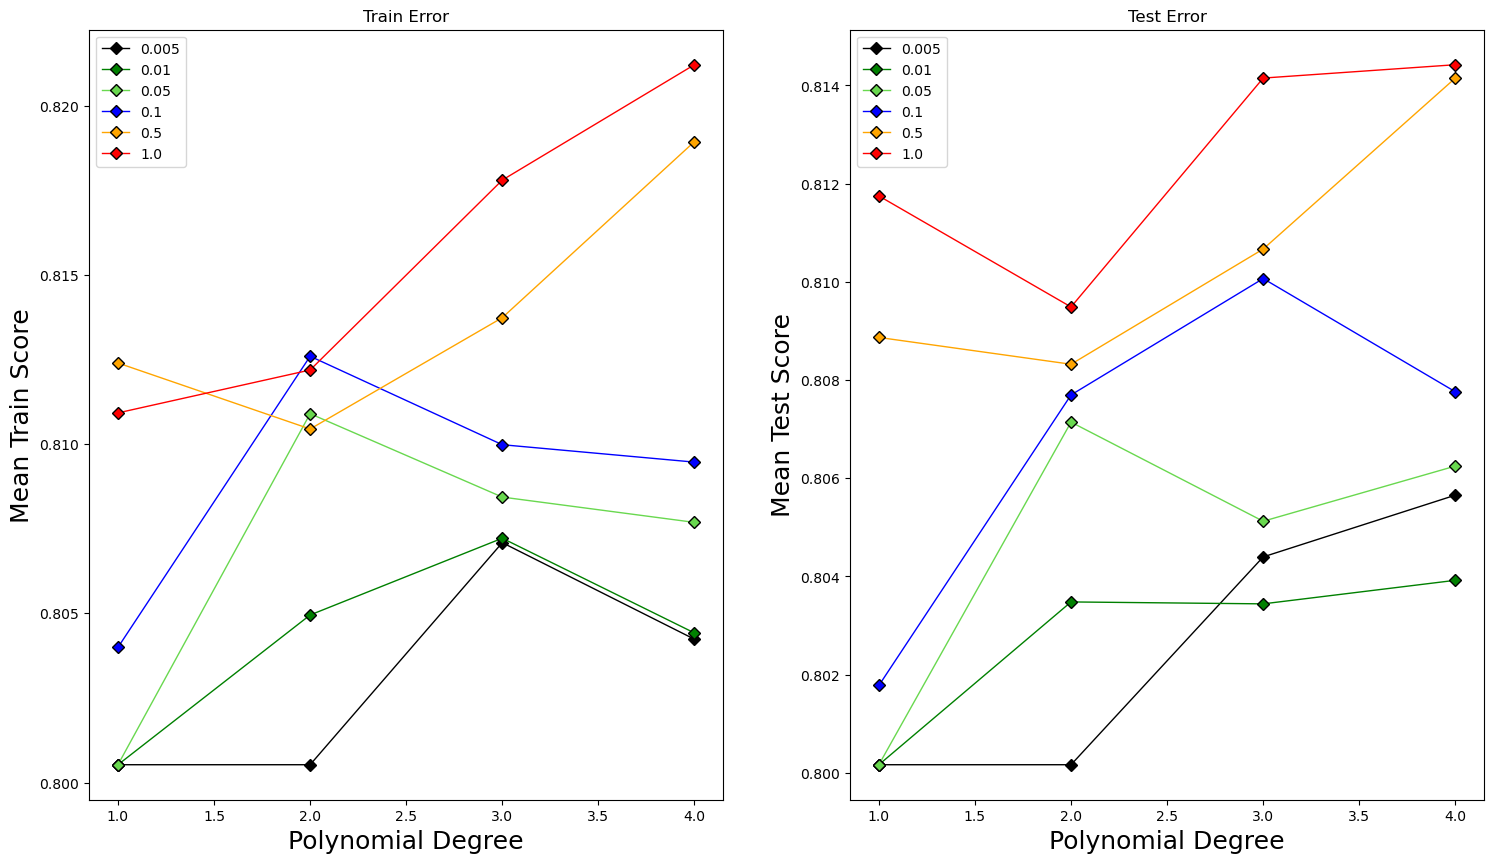

In [270]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red' , 'xkcd:dark orange']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 1
plt.figure(num=1, figsize=(18,10))


#Train Plot 

plt.subplot(1, 2, 1)

j = 0;
for i in lr_c:
    ind = LR_results_RF_FI.loc[LR_results_RF_FI['param_logisticR__C'] ==i]
    plt.plot(ind['param_poly__degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1
    
 
plt.legend()
plt.xlabel('Polynomial Degree' , fontsize = 18)
plt.ylabel('Mean Train Score' , fontsize = 18)
plt.title('Train Error')


#Test Plot

plt.subplot(1, 2, 2)

j = 0;
for i in lr_c:
    ind = LR_results_RF_FI.loc[LR_results_RF_FI['param_logisticR__C'] == i]
    plt.plot(ind['param_poly__degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1


plt.legend()
plt.xlabel('Polynomial Degree' ,  fontsize = 18)
plt.ylabel('Mean Test Score' ,  fontsize = 18)
plt.title('Test Error')


#Save And Show
#plt.savefig('Logistic_Regression_Parameters.png')
plt.show()


#### sfs svr

In [271]:
LR_Optimize_sfs_svr = GridSearchCV(pipe_PF_LR , param_grid  , cv=StKFold , return_train_score = True , verbose = 3, scoring='f1')
LR_Optimize_sfs_svr.fit(x_train_sfs_svr,y_train_sfs_svr)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 1/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.451, test=0.357) total time=   0.0s
[CV 2/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.423, test=0.444) total time=   0.0s
[CV 3/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.407, test=0.389) total time=   0.0s
[CV 4/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.393, test=0.431) total time=   0.0s
[CV 1/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.724, test=0.653) total time=   0.0s
[CV 2/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.704, test=0.716) total time=   0.0s
[CV 3/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.684, test=0.715) total time=   0.0s
[CV 4/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.697, test=0.737) total time=   0.0s
[CV 1/4] END logisticR__C=0.005, poly__degree=3;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END logisticR__C=0.00

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('logisticR',
                                        LogisticRegression(max_iter=250))]),
             param_grid={'logisticR__C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'poly__degree': [1, 2, 3, 4]},
             return_train_score=True, scoring='f1', verbose=3)

In [272]:
LR_results_sfs_svr = pd.DataFrame(LR_Optimize_sfs_svr.cv_results_)
LR_results_sfs_svr.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticR__C,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.002624,0.002418,0.006420,0.006296,0.005,1,"{'logisticR__C': 0.005, 'poly__degree': 1}",0.357143,0.444444,0.389381,0.431034,0.405501,0.034521,24,0.450704,0.422857,0.406977,0.392962,0.418375,0.021454
1,0.005168,0.001481,0.002751,0.000430,0.005,2,"{'logisticR__C': 0.005, 'poly__degree': 2}",0.652778,0.716216,0.715232,0.736842,0.705267,0.031509,22,0.724062,0.703786,0.683603,0.696629,0.702020,0.014639


In [273]:
Best_Val_Score_LR_sfs_svr = LR_Optimize_sfs_svr.best_score_
print(Best_Val_Score_LR_sfs_svr)
Best_Params_LR_sfs_svr = LR_Optimize_sfs_svr.best_params_
print(Best_Params_LR_sfs_svr)

0.8134920634920635
{'logisticR__C': 1.0, 'poly__degree': 1}


In [274]:
Best_Estimator_LR_sfs_svr = LR_Optimize_sfs_svr.best_estimator_
F1_Test_Score_LR_sfs_svr = f1_score(y_test_sfs_svr,Best_Estimator_LR_sfs_svr.predict(x_test_sfs_svr),average='binary')
Confusion_Matrix_LR_sfs_svr = confusion_matrix(y_test_sfs_svr,Best_Estimator_LR_sfs_svr.predict(x_test_sfs_svr))
print('Logistic Regression f1-score for sfs_svr Data: ',F1_Test_Score_LR_sfs_svr)
print('Logistic Regression Confusion Matrix for sfs_svr Data: \n',Confusion_Matrix_LR_sfs_svr)

Logistic Regression f1-score for sfs_svr Data:  0.8208955223880597
Logistic Regression Confusion Matrix for sfs_svr Data: 
 [[235  28]
 [ 20 110]]


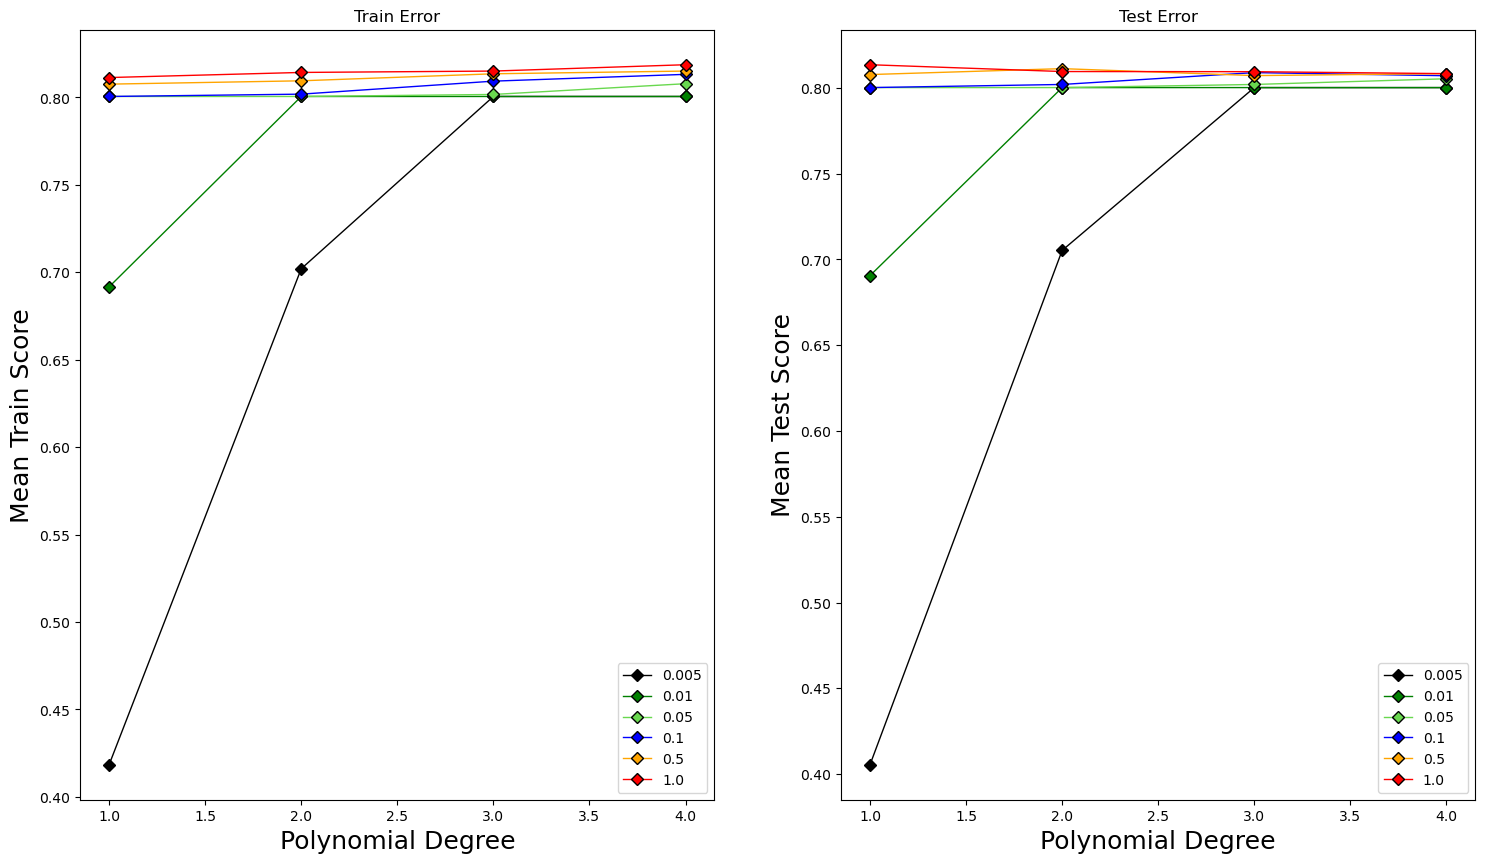

In [ ]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red' , 'xkcd:dark orange']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 2
plt.figure(num=2, figsize=(18,10))


#Train Plot 

plt.subplot(1, 2, 1)

j = 0;
for i in lr_c:
    ind = LR_results_sfs_svr.loc[LR_results_sfs_svr['param_logisticR__C'] ==i]
    plt.plot(ind['param_poly__degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1
    
 
plt.legend()
plt.xlabel('Polynomial Degree' , fontsize = 18)
plt.ylabel('Mean Train Score' , fontsize = 18)
plt.title('Train Error')


#Test Plot

plt.subplot(1, 2, 2)

j = 0;
for i in lr_c:
    ind = LR_results_sfs_svr.loc[LR_results_sfs_svr['param_logisticR__C'] == i]
    plt.plot(ind['param_poly__degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1


plt.legend()
plt.xlabel('Polynomial Degree' ,  fontsize = 18)
plt.ylabel('Mean Test Score' ,  fontsize = 18)
plt.title('Test Error')


#Save And Show
plt.show()

#### svr RFECV

In [279]:
LR_Optimize_svr_rfecv = GridSearchCV(pipe_PF_LR , param_grid  , cv=StKFold , return_train_score = True , verbose = 3 , scoring='f1')
LR_Optimize_svr_rfecv.fit(x_train_svr_rfecv,y_train_svr_rfecv)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 1/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.806, test=0.783) total time=   0.0s
[CV 3/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.788, test=0.838) total time=   0.0s
[CV 4/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.802, test=0.795) total time=   0.0s
[CV 1/4] END logisticR__C=0.005, poly__degree=3;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END logisticR__C=0.00

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('logisticR',
                                        LogisticRegression(max_iter=250))]),
             param_grid={'logisticR__C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'poly__degree': [1, 2, 3, 4]},
             return_train_score=True, scoring='f1', verbose=3)

In [280]:
LR_results_svr_rfecv = pd.DataFrame(LR_Optimize_svr_rfecv.cv_results_)
LR_results_svr_rfecv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticR__C,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.004507,0.000939,0.005928,0.001310,0.005,1,"{'logisticR__C': 0.005, 'poly__degree': 1}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003787,0.001459,0.005322,0.002535,0.005,2,"{'logisticR__C': 0.005, 'poly__degree': 2}",0.784091,0.783133,0.837989,0.795455,0.800167,0.022368,1,0.806142,0.806026,0.787645,0.802303,0.800529,0.007597


In [281]:
Best_Val_Score_LR_svr_rfecv = LR_Optimize_svr_rfecv.best_score_
print(Best_Val_Score_LR_svr_rfecv)
Best_Params_LR_svr_rfecv = LR_Optimize_svr_rfecv.best_params_
print(Best_Params_LR_svr_rfecv)

0.8001667028703947
{'logisticR__C': 0.005, 'poly__degree': 2}


In [287]:
Best_Estimator_LR_svr_rfecv = LR_Optimize_svr_rfecv.best_estimator_
F1_Test_Score_LR_svr_rfecv = f1_score(y_test_svr_rfecv,Best_Estimator_LR_svr_rfecv.predict(x_test_svr_rfecv),average='binary')
Confusion_Matrix_LR_svr_rfecv = confusion_matrix(y_test_svr_rfecv,Best_Estimator_LR_svr_rfecv.predict(x_test_svr_rfecv))
print('Logistic Regression f1-score for svr_rfecv Data: ',F1_Test_Score_LR_svr_rfecv)
print('Logistic Regression Confusion Matrix for svr_rfecv Data: \n',Confusion_Matrix_LR_svr_rfecv)

Logistic Regression f1-score for svr_rfecv Data:  0.8060836501901141
Logistic Regression Confusion Matrix for svr_rfecv Data: 
 [[236  27]
 [ 24 106]]


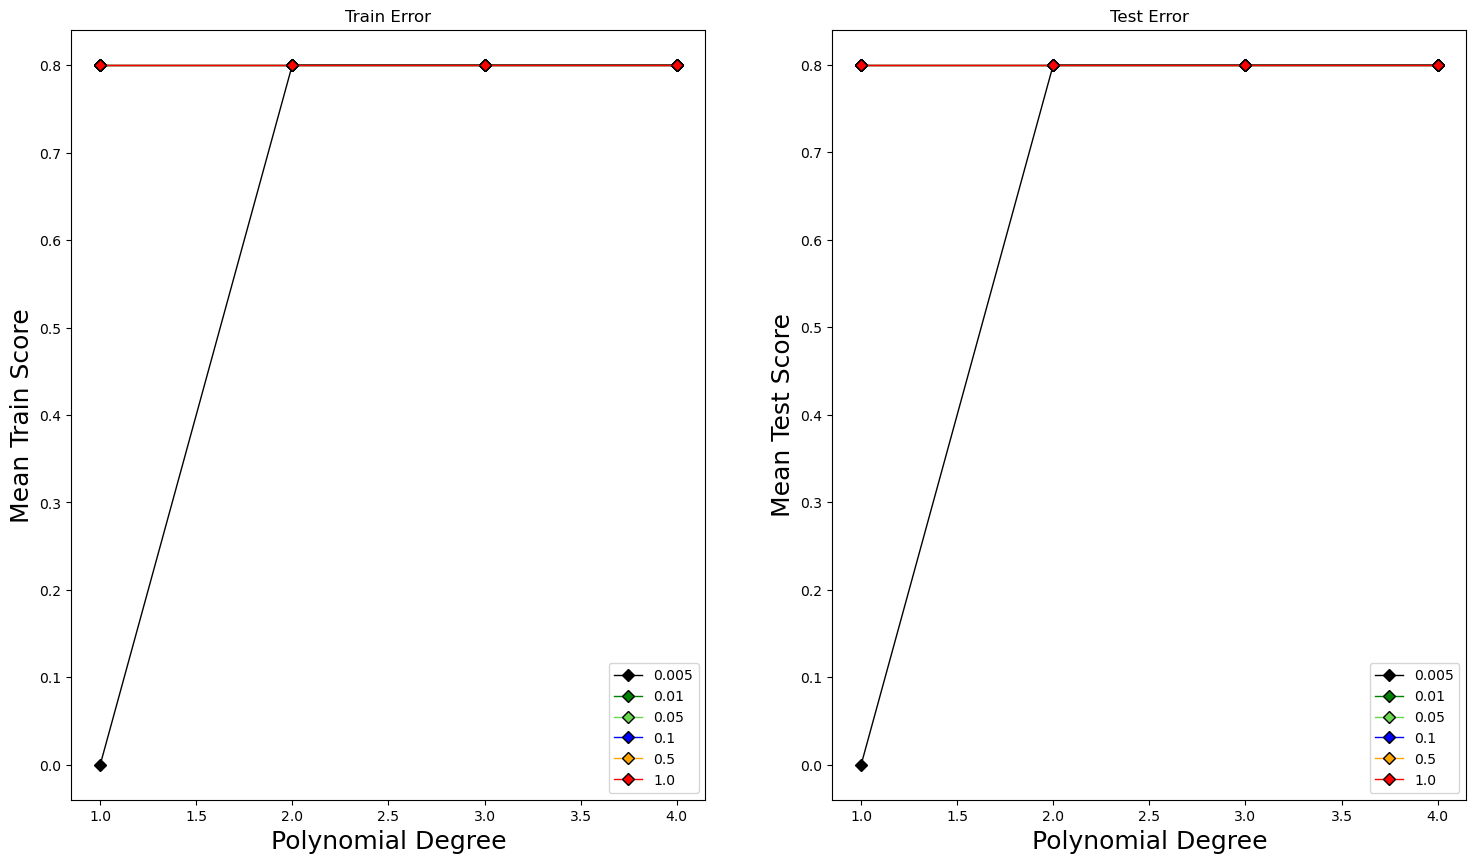

In [ ]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red' , 'xkcd:dark orange']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 3
plt.figure(num=3, figsize=(18,10))


#Train Plot 

plt.subplot(1, 2, 1)

j = 0;
for i in lr_c:
    ind = LR_results_svr_rfecv.loc[LR_results_svr_rfecv['param_logisticR__C'] ==i]
    plt.plot(ind['param_poly__degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1
    
 
plt.legend()
plt.xlabel('Polynomial Degree' , fontsize = 18)
plt.ylabel('Mean Train Score' , fontsize = 18)
plt.title('Train Error')


#Test Plot

plt.subplot(1, 2, 2)

j = 0;
for i in lr_c:
    ind = LR_results_svr_rfecv.loc[LR_results_svr_rfecv['param_logisticR__C'] == i]
    plt.plot(ind['param_poly__degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1


plt.legend()
plt.xlabel('Polynomial Degree' ,  fontsize = 18)
plt.ylabel('Mean Test Score' ,  fontsize = 18)
plt.title('Test Error')


#Save And Show
plt.show()

#### Original Data

In [284]:
LR_Optimize_original_data = GridSearchCV(pipe_PF_LR , param_grid  , cv=StKFold , return_train_score = True , verbose = 3, scoring='f1')
LR_Optimize_original_data.fit(x_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 1/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.778, test=0.756) total time=   0.0s
[CV 2/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.787, test=0.764) total time=   0.0s
[CV 3/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.773, test=0.814) total time=   0.0s
[CV 4/4] END logisticR__C=0.005, poly__degree=1;, score=(train=0.785, test=0.767) total time=   0.0s
[CV 1/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.810, test=0.780) total time=   0.0s
[CV 2/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.805, test=0.786) total time=   0.0s
[CV 3/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.794, test=0.833) total time=   0.0s
[CV 4/4] END logisticR__C=0.005, poly__degree=2;, score=(train=0.805, test=0.798) total time=   0.0s
[CV 1/4] END logisticR__C=0.005, poly__degree=3;, score=(train=0.811, test=0.780) total time=   0.0s
[CV 2/4] END logisticR__C=0.00

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('logisticR',
                                        LogisticRegression(max_iter=250))]),
             param_grid={'logisticR__C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'poly__degree': [1, 2, 3, 4]},
             return_train_score=True, scoring='f1', verbose=3)

In [285]:
LR_results_original_data = pd.DataFrame(LR_Optimize_original_data.cv_results_)
LR_results_original_data.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticR__C,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.005964,0.003525,0.006886,0.003589,0.005,1,"{'logisticR__C': 0.005, 'poly__degree': 1}",0.756098,0.764331,0.813953,0.767442,0.775456,0.022610,24,0.777555,0.786693,0.772636,0.784708,0.780398,0.005624
1,0.007559,0.003921,0.003428,0.002047,0.005,2,"{'logisticR__C': 0.005, 'poly__degree': 2}",0.779661,0.785714,0.833333,0.797753,0.799115,0.020801,23,0.809886,0.804511,0.793893,0.804554,0.803211,0.005807


In [286]:
Best_Val_Score_original_data = LR_Optimize_original_data.best_score_
print(Best_Val_Score_original_data)
Best_Params_LR_original_data = LR_Optimize_original_data.best_params_
print(Best_Params_LR_original_data)

0.8123257037621678
{'logisticR__C': 1.0, 'poly__degree': 1}


In [288]:
Best_Estimator_LR_original_data = LR_Optimize_original_data.best_estimator_
F1_Test_Score_LR_original_data = f1_score(y_test,Best_Estimator_LR_original_data.predict(x_test))
Confusion_Matrix_LR_original_data = confusion_matrix(y_test,Best_Estimator_LR_original_data.predict(x_test))
print('Logistic Regression f1-score for Original Data: ',F1_Test_Score_LR_original_data)
print('Logistic Regression Confusion Matrix for Original Data: \n',Confusion_Matrix_LR_original_data)

Logistic Regression f1-score for Original Data:  0.8164794007490637
Logistic Regression Confusion Matrix for Original Data: 
 [[235  28]
 [ 21 109]]


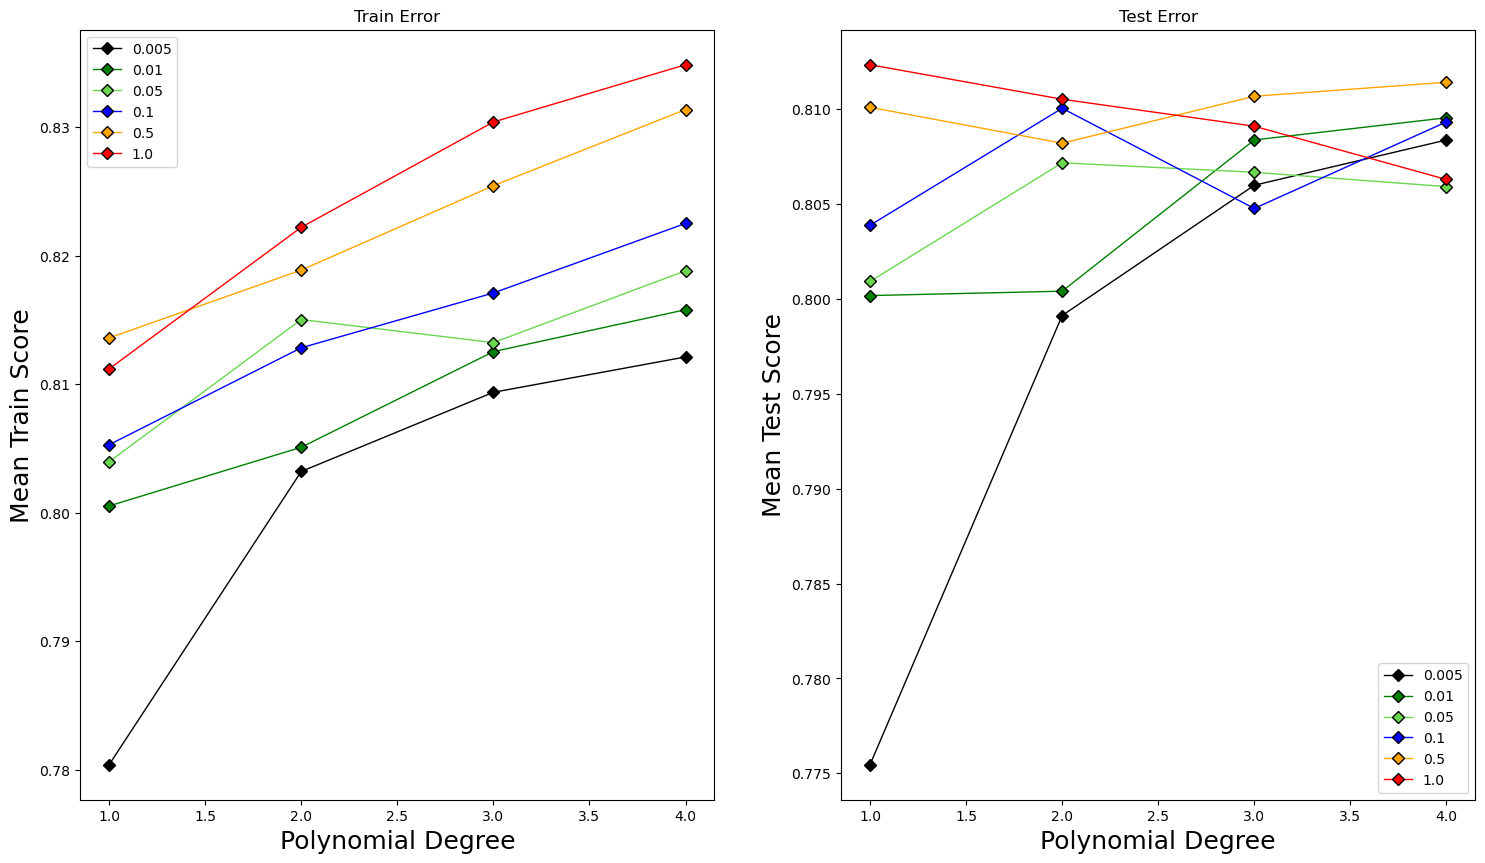

In [ ]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red' , 'xkcd:dark orange']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 4
plt.figure(num=4, figsize=(18,10))


#Train Plot 

plt.subplot(1, 2, 1)

j = 0;
for i in lr_c:
    ind = LR_results_original_data.loc[LR_results_original_data['param_logisticR__C'] ==i]
    plt.plot(ind['param_poly__degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1
    
 
plt.legend()
plt.xlabel('Polynomial Degree' , fontsize = 18)
plt.ylabel('Mean Train Score' , fontsize = 18)
plt.title('Train Error')


#Test Plot

plt.subplot(1, 2, 2)

j = 0;
for i in lr_c:
    ind = LR_results_original_data.loc[LR_results_original_data['param_logisticR__C'] == i]
    plt.plot(ind['param_poly__degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label=i, linewidth=1)
    j = j + 1


plt.legend()
plt.xlabel('Polynomial Degree' ,  fontsize = 18)
plt.ylabel('Mean Test Score' ,  fontsize = 18)
plt.title('Test Error')


#Save And Show
plt.show()

In [434]:
Information_df = pd.DataFrame({'Name':['RF Feature Importance', 'SFS SVC' ,'SVC RFECV', 'Original Data'],   
                         'Features':[[x_rf_feature_impor.columns],[x_sfs_svr.columns],[x_svr_rfecv.columns],[X.columns]], 
                         'Num Of Features':[len(x_rf_feature_impor.columns),len(x_sfs_svr.columns),len(x_svr_rfecv.columns),len(X.columns)],            
                         'C_LR':[Best_Params_LR_RF_FI['logisticR__C'],Best_Params_LR_sfs_svr['logisticR__C'],Best_Params_LR_svr_rfecv['logisticR__C'],Best_Params_LR_original_data['logisticR__C']],
                         'Degree_LR':[Best_Params_LR_RF_FI['poly__degree'],Best_Params_LR_sfs_svr['poly__degree'],Best_Params_LR_svr_rfecv['poly__degree'],Best_Params_LR_original_data['poly__degree']],
                         'Best Val Score LR': [Best_Val_Score_LR_RF_FI,Best_Val_Score_LR_sfs_svr,Best_Val_Score_LR_svr_rfecv,Best_Val_Score_original_data],
                         'Test f1-Score LR': [F1_Test_Score_LR_RF_FI, F1_Test_Score_LR_sfs_svr, F1_Test_Score_LR_svr_rfecv, F1_Test_Score_LR_original_data]     
 
                        })

Information_df

,Name,Features,Num Of Features,C_LR,Degree_LR,Best Val Score LR,Test f1-Score LR
0,RF Feature Importance,"[[Sex, FamilySize, Title_Miss, Title_Mr, Title...",8,1.000,4,0.814422,0.824427
1,SFS SVC,"[[Sex, FamilySize, Embarked_C, Title_Master, T...",6,1.000,1,0.813492,0.820896
2,SVC RFECV,[[Sex]],1,0.005,2,0.800167,0.806084
3,Original Data,"[[Sex, FamilySize, Embarked_C, Embarked_Q, Emb...",15,1.000,1,0.812326,0.816479


# KNN

In [307]:
knn_model = KNeighborsClassifier()

N_neighbors = [2,3,4,5,6,7]

#Parameters
param_grid_knn ={
    'n_neighbors':N_neighbors, 
}

#### Random Forest Feature Importance

In [308]:
knn_Optimize_RF_FI = GridSearchCV(knn_model, param_grid_knn, cv=StKFold, return_train_score=True, verbose=2, scoring='f1')
knn_Optimize_RF_FI.fit(x_train_rf_feature_impor,y_train_rf_feature_impor)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]},
             return_train_score=True, scoring='f1', verbose=2)

In [309]:
knn_results_RF_FI = pd.DataFrame(knn_Optimize_RF_FI.cv_results_)
knn_results_RF_FI.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.001397,0.001504,0.018124,0.001781,2,{'n_neighbors': 2},0.753086,0.756098,0.756098,0.760736,0.756504,0.002735,6,0.843220,0.871901,0.852941,0.878850,0.861728,0.014286
1,0.000878,0.000895,0.017619,0.002132,3,{'n_neighbors': 3},0.786885,0.751381,0.813187,0.786517,0.784493,0.021963,5,0.864151,0.871028,0.850662,0.869403,0.863811,0.008006


In [310]:
Best_Val_Score_knn_RF_FI = knn_Optimize_RF_FI.best_score_
print(Best_Val_Score_knn_RF_FI)
Best_Params_knn_RF_FI = knn_Optimize_RF_FI.best_params_
print(Best_Params_knn_RF_FI)

0.8174492106953317
{'n_neighbors': 6}


In [311]:
Best_Estimator_knn_RF_FI = knn_Optimize_RF_FI.best_estimator_
F1_Test_Score_knn_RF_FI = f1_score(y_test_rf_feature_impor,Best_Estimator_knn_RF_FI.predict(x_test_rf_feature_impor))
Confusion_Matrix_knn_RF_FI = confusion_matrix(y_test_rf_feature_impor,Best_Estimator_knn_RF_FI.predict(x_test_rf_feature_impor))
print('KNN f1-score for RF_FI Data: ',F1_Test_Score_knn_RF_FI)
print('KNN Confusion Matrix for RF_FI Data: \n',Confusion_Matrix_knn_RF_FI)

KNN f1-score for RF_FI Data:  0.8207171314741036
KNN Confusion Matrix for RF_FI Data: 
 [[245  18]
 [ 27 103]]


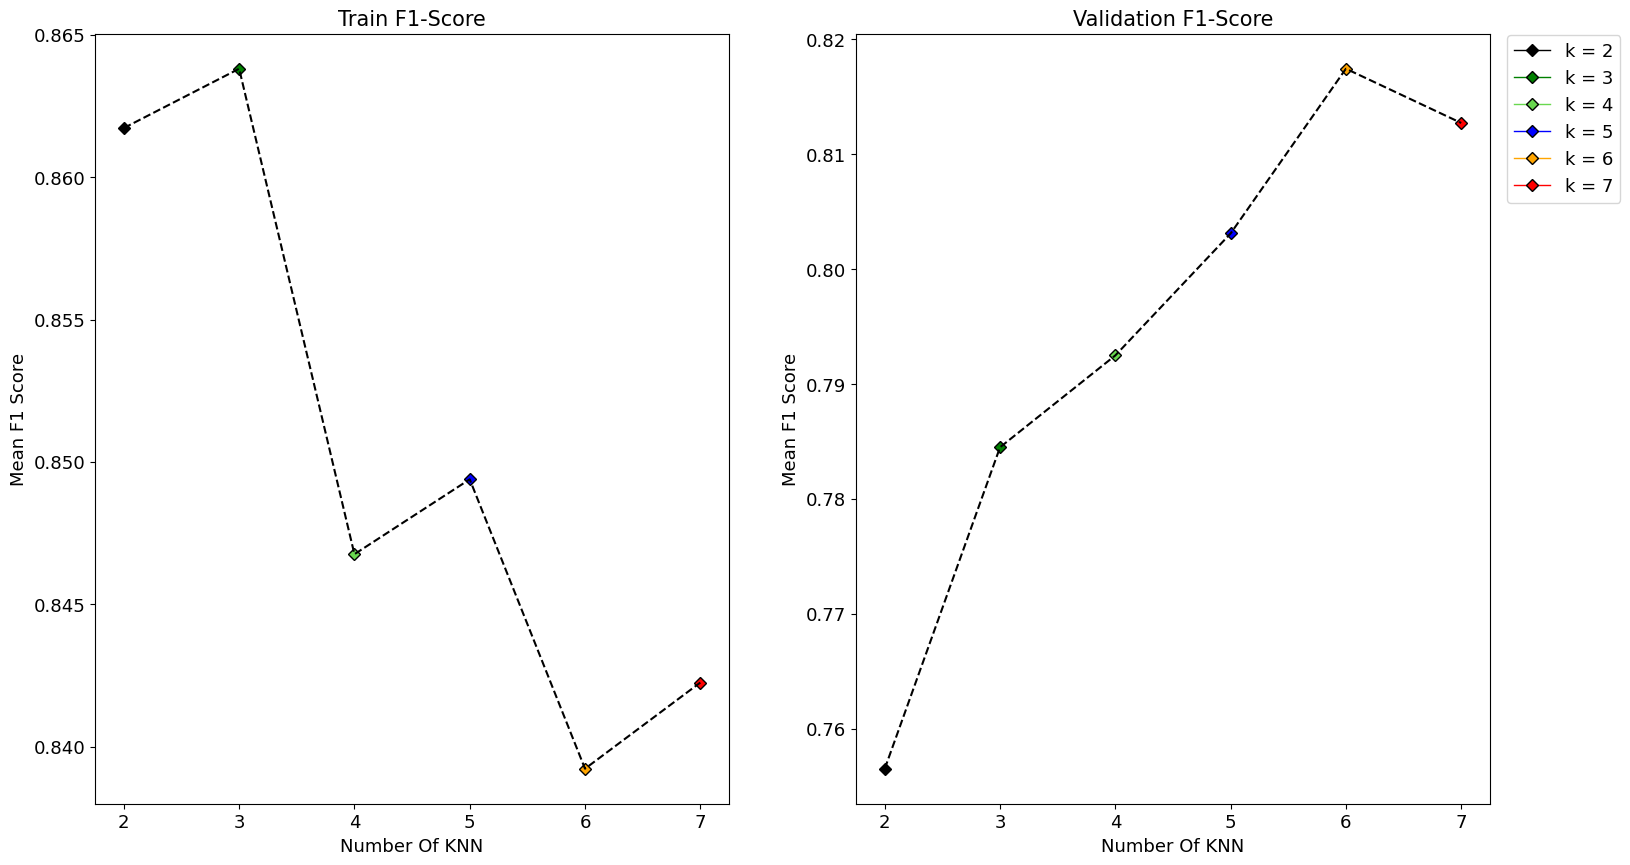

In [ ]:

#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 5
fig5 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1-Score' ,  fontsize = 15)
axs[1].set_title('Validation F1-Score' ,  fontsize = 15)

axs[0].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[0].set_ylabel('Mean F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[1].set_ylabel('Mean F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in N_neighbors:
    ind = knn_results_RF_FI.loc[knn_results_RF_FI['param_n_neighbors'] == i]
    axs[0].plot(ind['param_n_neighbors'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in N_neighbors:
    ind = knn_results_RF_FI.loc[knn_results_RF_FI['param_n_neighbors'] == i]
    axs[1].plot(ind['param_n_neighbors'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1

plt.setp(axs, xticks=N_neighbors)

axs[0].plot(N_neighbors, knn_results_RF_FI['mean_train_score'], 'k--')
axs[1].plot(N_neighbors, knn_results_RF_FI['mean_test_score'], 'k--')

axs[1].legend(bbox_to_anchor = (1.22, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\KNN_Parameters_F1_Score_5Kfold.png')
plt.show()


#### sfs svr

In [313]:
knn_Optimize_sfs_svr = GridSearchCV(knn_model, param_grid_knn, cv=StKFold, return_train_score=True, verbose=2, scoring='f1')
knn_Optimize_sfs_svr.fit(x_train_sfs_svr,y_train_sfs_svr)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]},
             return_train_score=True, scoring='f1', verbose=2)

In [314]:
knn_results_sfs_svr = pd.DataFrame(knn_Optimize_sfs_svr.cv_results_)
Best_Val_Score_knn_sfs_svr = knn_Optimize_sfs_svr.best_score_
print(Best_Val_Score_knn_sfs_svr)
Best_Params_knn_sfs_svr = knn_Optimize_sfs_svr.best_params_
print(Best_Params_knn_sfs_svr)

0.8136359514287529
{'n_neighbors': 5}


In [315]:
Best_Estimator_knn_sfs_svr = knn_Optimize_sfs_svr.best_estimator_
F1_Test_Score_knn_sfs_svr = f1_score(y_test_sfs_svr,Best_Estimator_knn_sfs_svr.predict(x_test_sfs_svr), average='binary')
Confusion_Matrix_knn_sfs_svr = confusion_matrix(y_test_sfs_svr,Best_Estimator_knn_sfs_svr.predict(x_test_sfs_svr))
print('KNN f1-score for sfs_svr Data: ',F1_Test_Score_knn_sfs_svr)
print('KNN Confusion Matrix for sfs_svr Data: \n',Confusion_Matrix_knn_sfs_svr)

KNN f1-score for sfs_svr Data:  0.7698744769874477
KNN Confusion Matrix for sfs_svr Data: 
 [[246  17]
 [ 38  92]]


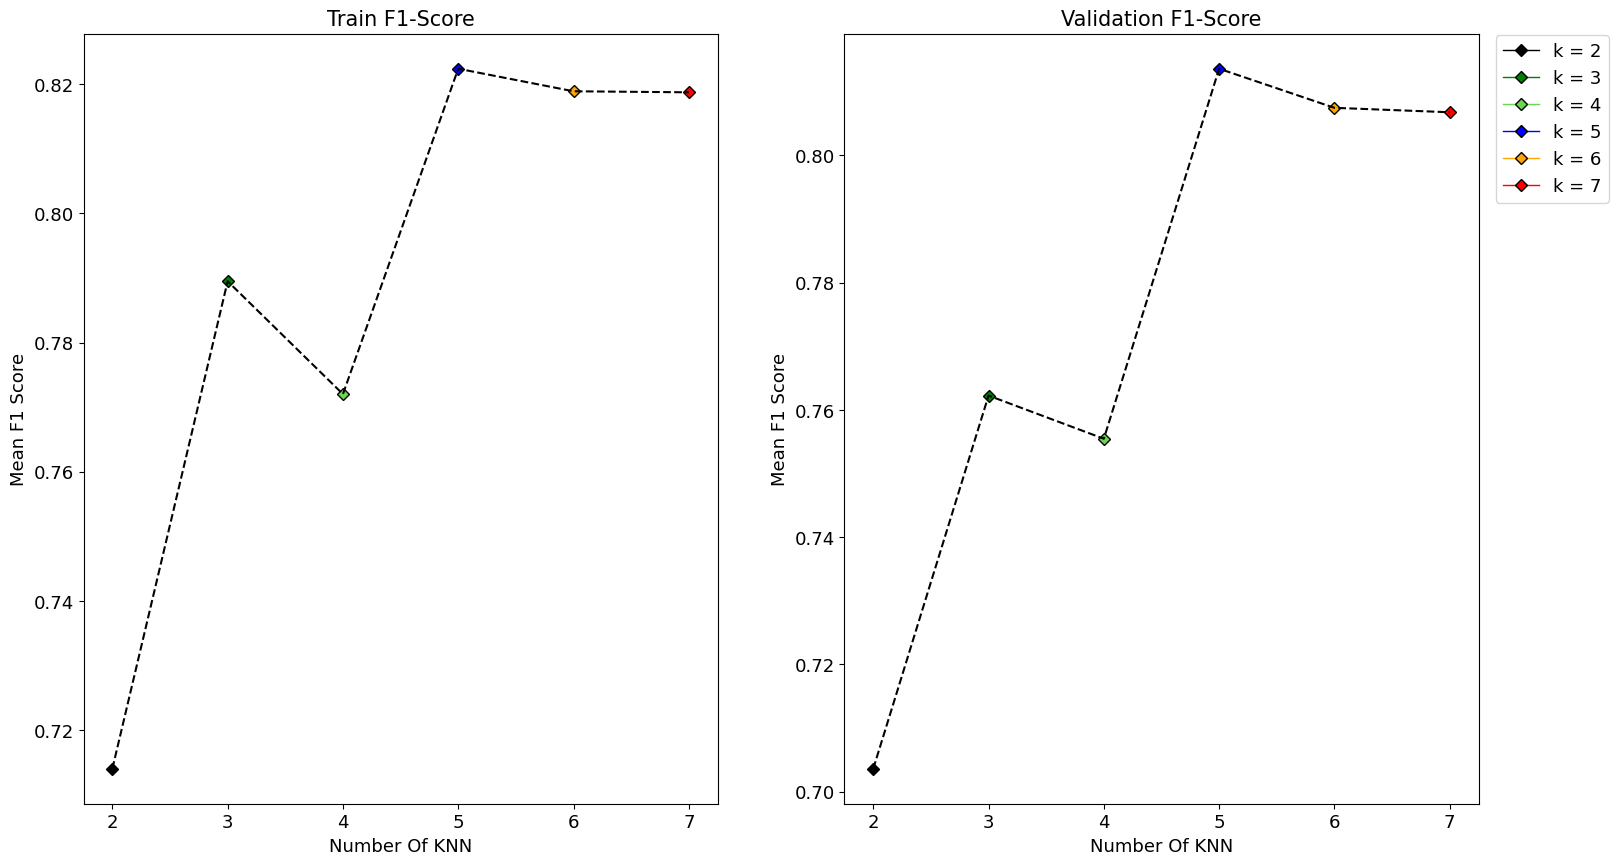

In [ ]:


#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 6
fig6 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1-Score' ,  fontsize = 15)
axs[1].set_title('Validation F1-Score' ,  fontsize = 15)

axs[0].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[0].set_ylabel('Mean F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[1].set_ylabel('Mean F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in N_neighbors:
    ind = knn_results_sfs_svr.loc[knn_results_sfs_svr['param_n_neighbors'] == i]
    axs[0].plot(ind['param_n_neighbors'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in N_neighbors:
    ind = knn_results_sfs_svr.loc[knn_results_sfs_svr['param_n_neighbors'] == i]
    axs[1].plot(ind['param_n_neighbors'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1

plt.setp(axs, xticks=N_neighbors)

axs[0].plot(N_neighbors, knn_results_sfs_svr['mean_train_score'], 'k--')
axs[1].plot(N_neighbors, knn_results_sfs_svr['mean_test_score'], 'k--')

axs[1].legend(bbox_to_anchor = (1.22, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\KNN_Parameters_F1_Score_5Kfold.png')
plt.show()


#### svr RFECV

In [317]:
knn_Optimize_svr_rfecv = GridSearchCV(knn_model, param_grid_knn, cv=StKFold, return_train_score=True, verbose=2, scoring='f1')
knn_Optimize_svr_rfecv.fit(x_train_svr_rfecv,y_train_svr_rfecv)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]},
             return_train_score=True, scoring='f1', verbose=2)

In [318]:
knn_results_svr_rfecv = pd.DataFrame(knn_Optimize_svr_rfecv.cv_results_)
Best_Val_Score_knn_svr_rfecv = knn_Optimize_svr_rfecv.best_score_
print(Best_Val_Score_knn_svr_rfecv)
Best_Params_knn_svr_rfecv = knn_Optimize_svr_rfecv.best_params_
print(Best_Params_knn_svr_rfecv)

0.8001667028703947
{'n_neighbors': 3}


In [319]:
Best_Estimator_knn_svr_rfecv = knn_Optimize_svr_rfecv.best_estimator_
F1_Test_Score_knn_svr_rfecv = f1_score(y_test_svr_rfecv,Best_Estimator_knn_svr_rfecv.predict(x_test_svr_rfecv))
Confusion_Matrix_knn_svr_rfecv = confusion_matrix(y_test_svr_rfecv,Best_Estimator_knn_svr_rfecv.predict(x_test_svr_rfecv))
print('KNN f1-score for svr_rfecv Data: ',F1_Test_Score_knn_svr_rfecv)
print('KNN Confusion Matrix for svr_rfecv Data: \n',Confusion_Matrix_knn_svr_rfecv)

KNN f1-score for svr_rfecv Data:  0.8060836501901141
KNN Confusion Matrix for svr_rfecv Data: 
 [[236  27]
 [ 24 106]]


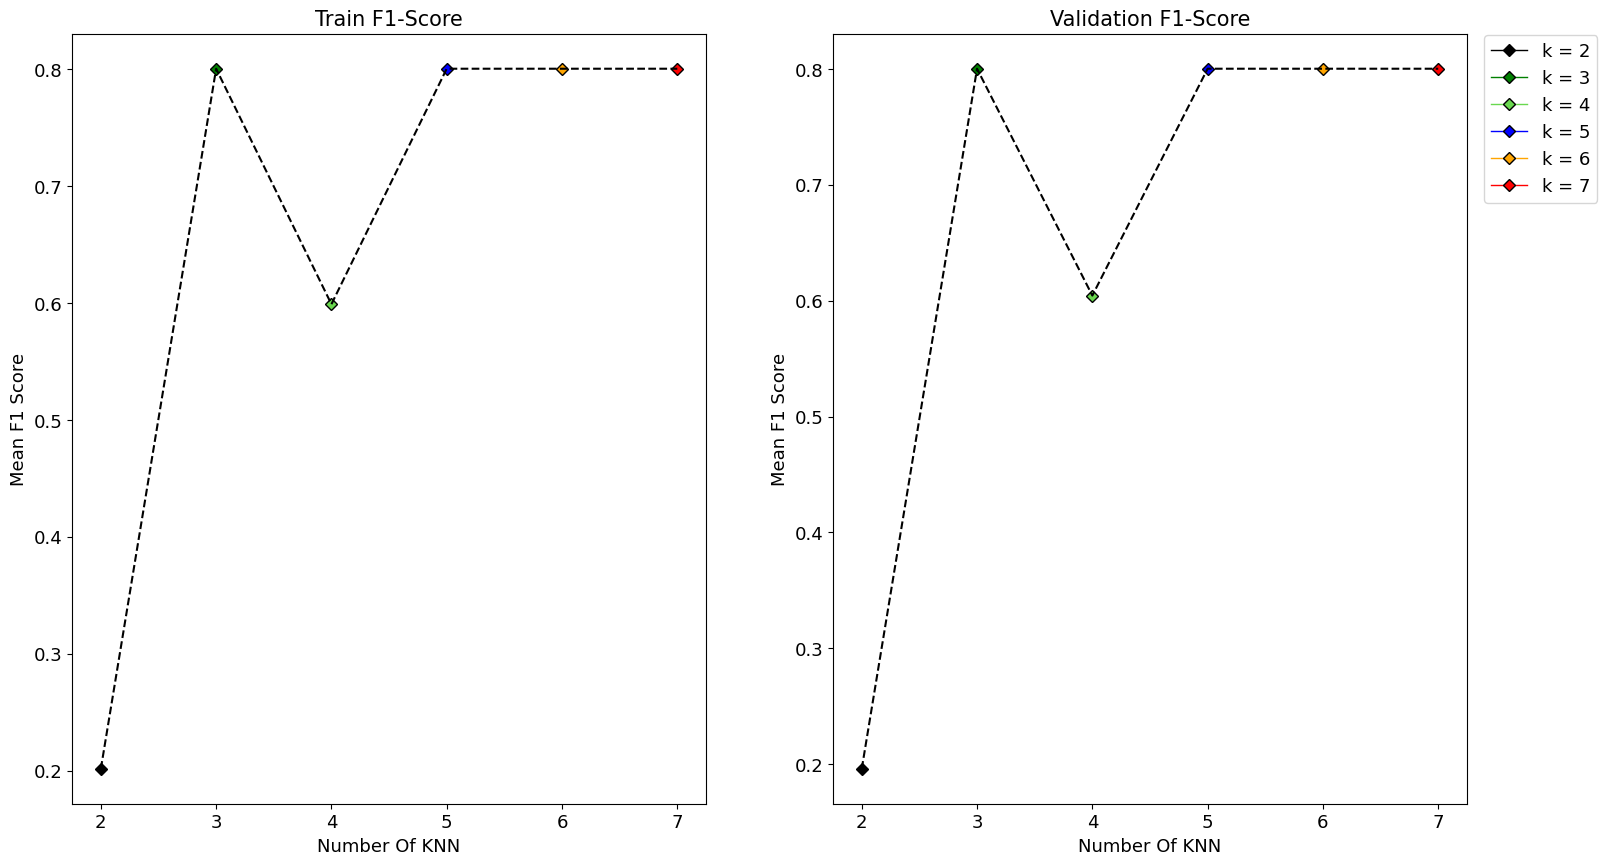

In [ ]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 7
fig7 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1-Score' ,  fontsize = 15)
axs[1].set_title('Validation F1-Score' ,  fontsize = 15)

axs[0].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[0].set_ylabel('Mean F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[1].set_ylabel('Mean F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in N_neighbors:
    ind = knn_results_svr_rfecv.loc[knn_results_svr_rfecv['param_n_neighbors'] == i]
    axs[0].plot(ind['param_n_neighbors'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in N_neighbors:
    ind = knn_results_svr_rfecv.loc[knn_results_svr_rfecv['param_n_neighbors'] == i]
    axs[1].plot(ind['param_n_neighbors'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1

plt.setp(axs, xticks=N_neighbors)

axs[0].plot(N_neighbors, knn_results_svr_rfecv['mean_train_score'], 'k--')
axs[1].plot(N_neighbors, knn_results_svr_rfecv['mean_test_score'], 'k--')

axs[1].legend(bbox_to_anchor = (1.22, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\KNN_Parameters_F1_Score_5Kfold.png')
plt.show()


#### Original Data

In [321]:
knn_Optimize_original_data = GridSearchCV(knn_model, param_grid_knn, cv=StKFold, return_train_score=True, verbose=3, scoring='f1')
knn_Optimize_original_data.fit(x_train,y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END .n_neighbors=2;, score=(train=0.863, test=0.754) total time=   0.0s
[CV 2/4] END .n_neighbors=2;, score=(train=0.867, test=0.717) total time=   0.0s
[CV 3/4] END .n_neighbors=2;, score=(train=0.851, test=0.773) total time=   0.0s
[CV 4/4] END .n_neighbors=2;, score=(train=0.874, test=0.778) total time=   0.0s
[CV 1/4] END .n_neighbors=3;, score=(train=0.869, test=0.806) total time=   0.0s
[CV 2/4] END .n_neighbors=3;, score=(train=0.862, test=0.793) total time=   0.0s
[CV 3/4] END .n_neighbors=3;, score=(train=0.866, test=0.837) total time=   0.0s
[CV 4/4] END .n_neighbors=3;, score=(train=0.881, test=0.800) total time=   0.0s
[CV 1/4] END .n_neighbors=4;, score=(train=0.857, test=0.814) total time=   0.0s
[CV 2/4] END .n_neighbors=4;, score=(train=0.846, test=0.826) total time=   0.0s
[CV 3/4] END .n_neighbors=4;, score=(train=0.839, test=0.834) total time=   0.0s
[CV 4/4] END .n_neighbors=4;, score=(train=0.860,

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]},
             return_train_score=True, scoring='f1', verbose=3)

In [322]:
knn_results_original_data = pd.DataFrame(knn_Optimize_original_data.cv_results_)
Best_Val_Score_knn_original_data = knn_Optimize_original_data.best_score_
print(Best_Val_Score_knn_original_data)
Best_Params_knn_original_data = knn_Optimize_original_data.best_params_
print(Best_Params_knn_original_data)

0.8275799515583024
{'n_neighbors': 5}


In [323]:
Best_Estimator_knn_original_data = knn_Optimize_original_data.best_estimator_
F1_Test_Score_knn_mutual_info = f1_score(y_test,Best_Estimator_knn_original_data.predict(x_test))
Confusion_Matrix_knn_original_data = confusion_matrix(y_test,Best_Estimator_knn_original_data.predict(x_test))
print('KNN f1-score for Original Data: ',F1_Test_Score_knn_mutual_info)
print('KNN Confusion Matrix for Original Data: \n',Confusion_Matrix_knn_original_data)

KNN f1-score for Original Data:  0.7938931297709924
KNN Confusion Matrix for Original Data: 
 [[235  28]
 [ 26 104]]


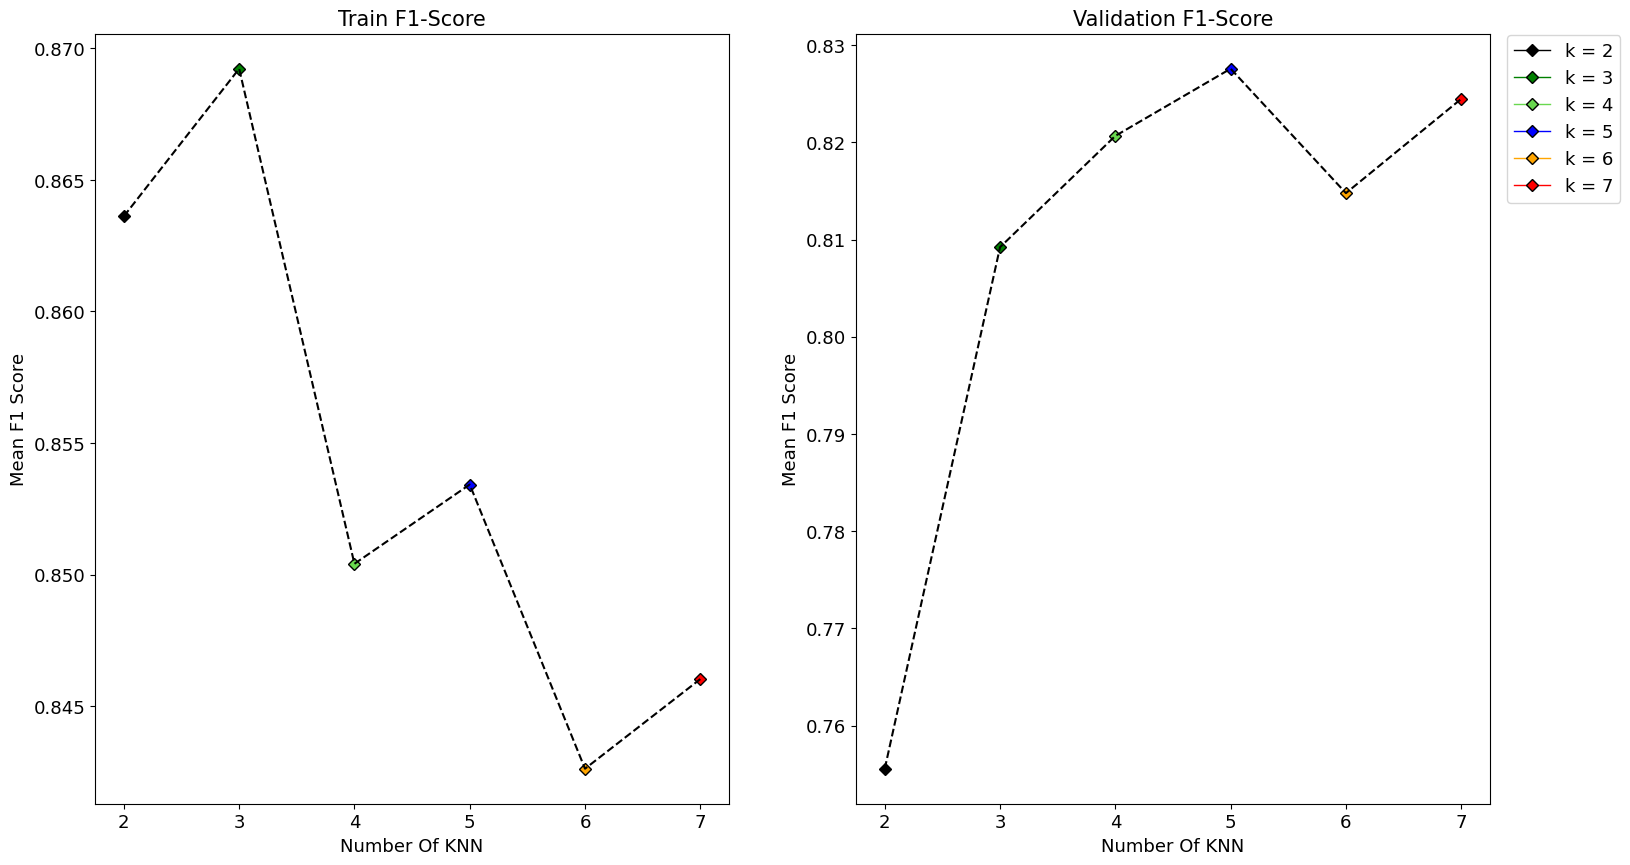

In [ ]:
#Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])

#Figure 8
fig8 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1-Score' ,  fontsize = 15)
axs[1].set_title('Validation F1-Score' ,  fontsize = 15)

axs[0].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[0].set_ylabel('Mean F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Number Of KNN' ,  fontsize = 13)
axs[1].set_ylabel('Mean F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in N_neighbors:
    ind = knn_results_original_data.loc[knn_results_original_data['param_n_neighbors'] == i]
    axs[0].plot(ind['param_n_neighbors'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in N_neighbors:
    ind = knn_results_original_data.loc[knn_results_original_data['param_n_neighbors'] == i]
    axs[1].plot(ind['param_n_neighbors'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='k = '+str(i), linewidth= 1)
    j = j + 1

plt.setp(axs, xticks=N_neighbors)

axs[0].plot(N_neighbors, knn_results_original_data['mean_train_score'], 'k--')
axs[1].plot(N_neighbors, knn_results_original_data['mean_test_score'], 'k--')

axs[1].legend(bbox_to_anchor = (1.22, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\KNN_Parameters_F1_Score_5Kfold.png')
plt.show()


In [435]:
Information_df['N neighbors'] = [Best_Params_knn_RF_FI['n_neighbors'], Best_Params_knn_sfs_svr['n_neighbors'],Best_Params_knn_svr_rfecv['n_neighbors'],Best_Params_knn_original_data['n_neighbors']]
Information_df['Best Val Score KNN'] = [Best_Val_Score_knn_RF_FI,Best_Val_Score_knn_sfs_svr,Best_Val_Score_knn_svr_rfecv,Best_Val_Score_knn_original_data]
Information_df['Test f1-Score KNN'] =  [F1_Test_Score_knn_RF_FI, F1_Test_Score_knn_sfs_svr, F1_Test_Score_knn_svr_rfecv, F1_Test_Score_knn_mutual_info]

Information_df

,Name,Features,Num Of Features,C_LR,Degree_LR,Best Val Score LR,Test f1-Score LR,N neighbors,Best Val Score KNN,Test f1-Score KNN
0,RF Feature Importance,"[[Sex, FamilySize, Title_Miss, Title_Mr, Title...",8,1.000,4,0.814422,0.824427,6,0.817449,0.820717
1,SFS SVC,"[[Sex, FamilySize, Embarked_C, Title_Master, T...",6,1.000,1,0.813492,0.820896,5,0.813636,0.769874
2,SVC RFECV,[[Sex]],1,0.005,2,0.800167,0.806084,3,0.800167,0.806084
3,Original Data,"[[Sex, FamilySize, Embarked_C, Embarked_Q, Emb...",15,1.000,1,0.812326,0.816479,5,0.827580,0.793893


# Support Vector Machine

## SVM Poly

In [333]:
svm_poly = SVC(kernel='poly' , max_iter=-1)

degree_svm_poly = [1,2,3,4,5]
C_svm_poly = [5*10**-3, 10**-2, 5*10**-2, 10**-1, 5*10**-1, 1.0]

param_grid_svc_poly ={
        'degree' : degree_svm_poly,
        'C':  C_svm_poly,
}

#### Random Forest Feature Importance

In [334]:
svc_poly_Optimize_RF_FI = GridSearchCV(svm_poly, param_grid_svc_poly, cv=StKFold, return_train_score=True, verbose=3, scoring='f1')
svc_poly_Optimize_RF_FI.fit(x_train_rf_feature_impor,y_train_rf_feature_impor)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV 1/4] END C=0.005, degree=1;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END C=0.005, degree=1;, score=(train=0.806, test=0.783) total time=   0.0s
[CV 3/4] END C=0.005, degree=1;, score=(train=0.788, test=0.838) total time=   0.0s
[CV 4/4] END C=0.005, degree=1;, score=(train=0.802, test=0.795) total time=   0.0s
[CV 1/4] END C=0.005, degree=2;, score=(train=0.806, test=0.785) total time=   0.0s
[CV 2/4] END C=0.005, degree=2;, score=(train=0.804, test=0.795) total time=   0.0s
[CV 3/4] END C=0.005, degree=2;, score=(train=0.791, test=0.815) total time=   0.0s
[CV 4/4] END C=0.005, degree=2;, score=(train=0.801, test=0.808) total time=   0.0s
[CV 1/4] END C=0.005, degree=3;, score=(train=0.801, test=0.777) total time=   0.0s
[CV 2/4] END C=0.005, degree=3;, score=(train=0.797, test=0.791) total time=   0.0s
[CV 3/4] END C=0.005, degree=3;, score=(train=0.789, test=0.802) total time=   0.0s
[CV 4/4] END C

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(kernel='poly'),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'degree': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='f1', verbose=3)

In [335]:
svc_poly_results_RF_FI = pd.DataFrame(svc_poly_Optimize_RF_FI.cv_results_)
Best_Val_Score_svc_poly_RF_FI = svc_poly_Optimize_RF_FI.best_score_
print(Best_Val_Score_svc_poly_RF_FI)
Best_Params_svc_poly_RF_FI = svc_poly_Optimize_RF_FI.best_params_
print(Best_Params_svc_poly_RF_FI)

0.8129655111257885
{'C': 0.5, 'degree': 3}


In [336]:
Best_Estimator_svc_poly_RF_FI = svc_poly_Optimize_RF_FI.best_estimator_
F1_Test_Score_svc_poly_RF_FI = f1_score(y_test_rf_feature_impor,Best_Estimator_svc_poly_RF_FI.predict(x_test_rf_feature_impor))
Confusion_Matrix_svc_poly_RF_FI = confusion_matrix(y_test_rf_feature_impor,Best_Estimator_svc_poly_RF_FI.predict(x_test_rf_feature_impor))
print('SVC_poly f1-score for RF_FI Data: ',F1_Test_Score_svc_poly_RF_FI)
print('SVC_poly Confusion Matrix for RF_FI Data: \n',Confusion_Matrix_svc_poly_RF_FI)

SVC_poly f1-score for RF_FI Data:  0.8195488721804511
SVC_poly Confusion Matrix for RF_FI Data: 
 [[236  27]
 [ 21 109]]


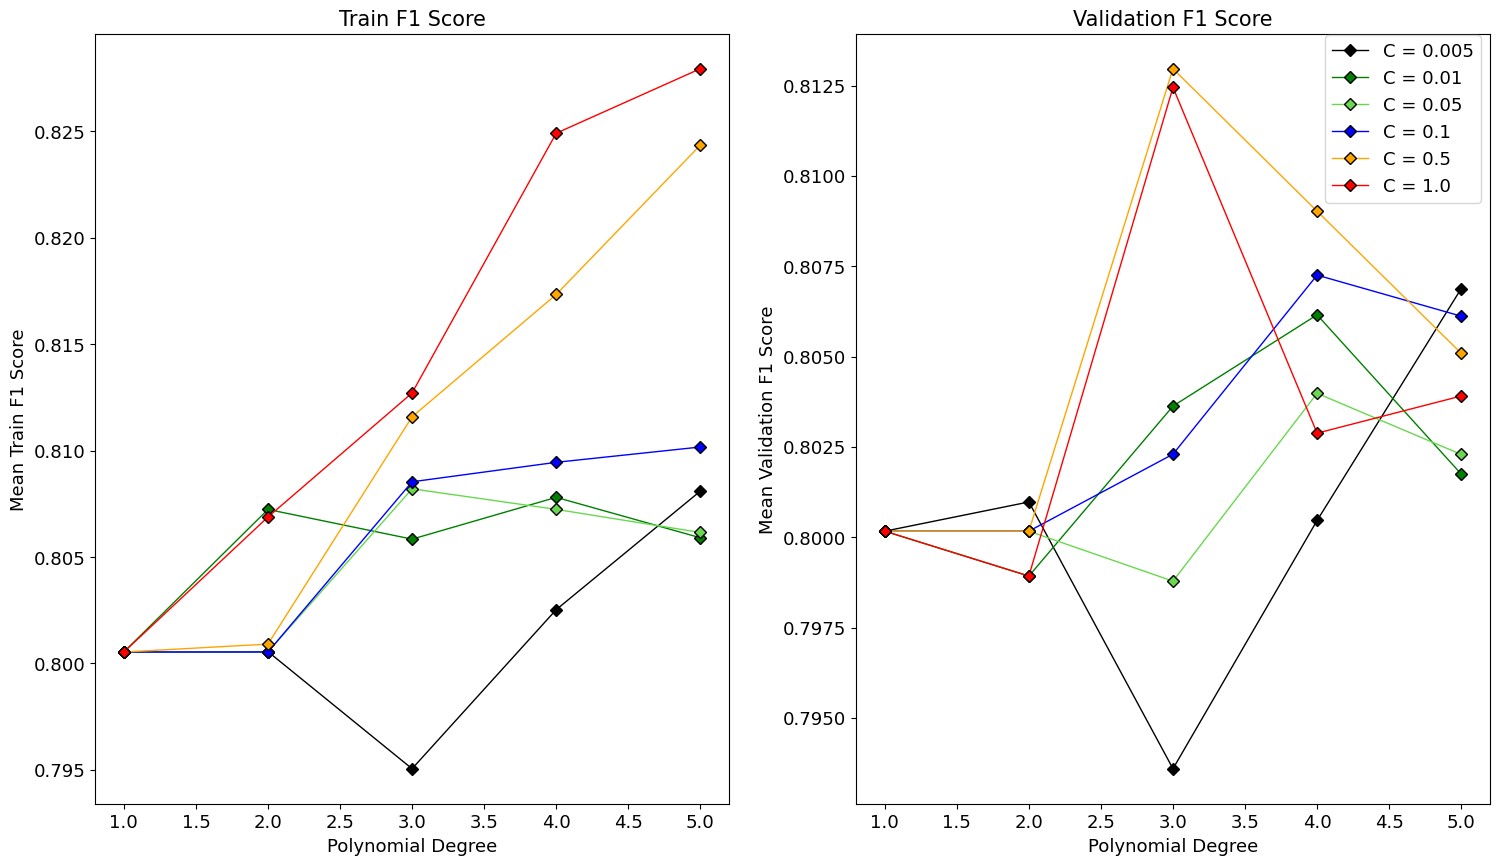

In [ ]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 9
fig9 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1 Score' ,  fontsize = 15)
axs[1].set_title('Validation F1 Score' ,  fontsize = 15)

axs[0].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svm_poly:
    ind = svc_poly_results_RF_FI.loc[svc_poly_results_RF_FI['param_C'] == i]
    axs[0].plot(ind['param_degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svm_poly:
    ind = svc_poly_results_RF_FI.loc[svc_poly_results_RF_FI['param_C'] == i]
    axs[1].plot(ind['param_degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### sfs svr

In [338]:
svc_poly_Optimize_sfs_svr = GridSearchCV(svm_poly, param_grid_svc_poly, cv=StKFold, return_train_score=True, verbose=3, scoring='f1')
svc_poly_Optimize_sfs_svr.fit(x_train_sfs_svr,y_train_sfs_svr)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV 1/4] END C=0.005, degree=1;, score=(train=0.504, test=0.400) total time=   0.0s
[CV 2/4] END C=0.005, degree=1;, score=(train=0.474, test=0.492) total time=   0.0s
[CV 3/4] END C=0.005, degree=1;, score=(train=0.477, test=0.484) total time=   0.0s
[CV 4/4] END C=0.005, degree=1;, score=(train=0.459, test=0.535) total time=   0.0s
[CV 1/4] END C=0.005, degree=2;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END C=0.005, degree=2;, score=(train=0.806, test=0.783) total time=   0.0s
[CV 3/4] END C=0.005, degree=2;, score=(train=0.788, test=0.838) total time=   0.0s
[CV 4/4] END C=0.005, degree=2;, score=(train=0.802, test=0.795) total time=   0.0s
[CV 1/4] END C=0.005, degree=3;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END C=0.005, degree=3;, score=(train=0.806, test=0.783) total time=   0.0s
[CV 3/4] END C=0.005, degree=3;, score=(train=0.710, test=0.730) total time=   0.0s
[CV 4/4] END C

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(kernel='poly'),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'degree': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='f1', verbose=3)

In [339]:
svc_poly_results_sfs_svr = pd.DataFrame(svc_poly_Optimize_sfs_svr.cv_results_)
Best_Val_Score_svc_poly_sfs_svr = svc_poly_Optimize_sfs_svr.best_score_
print(Best_Val_Score_svc_poly_sfs_svr)
Best_Params_svc_poly_sfs_svr = svc_poly_Optimize_sfs_svr.best_params_
print(Best_Params_svc_poly_sfs_svr)

0.8100370347121965
{'C': 1.0, 'degree': 3}


In [340]:
Best_Estimator_svc_poly_sfs_svr = svc_poly_Optimize_sfs_svr.best_estimator_
F1_Test_Score_svc_poly_sfs_svr = f1_score(y_test_sfs_svr,Best_Estimator_svc_poly_sfs_svr.predict(x_test_sfs_svr))
Confusion_Matrix_svc_poly_sfs_svr = confusion_matrix(y_test_rf_feature_impor,Best_Estimator_svc_poly_sfs_svr.predict(x_test_sfs_svr))
print('SVC_poly f1-score for sfs_svr Data: ',F1_Test_Score_svc_poly_sfs_svr)
print('SVC_poly Confusion Matrix for sfs_svr Data: \n',Confusion_Matrix_svc_poly_sfs_svr)

SVC_poly f1-score for sfs_svr Data:  0.8181818181818182
SVC_poly Confusion Matrix for sfs_svr Data: 
 [[237  26]
 [ 22 108]]


#### svr RFECV

In [342]:
svc_poly_Optimize_svr_rfecv = GridSearchCV(svm_poly, param_grid_svc_poly, cv=StKFold, return_train_score=True, verbose=3, scoring='f1')
svc_poly_Optimize_svr_rfecv.fit(x_train_svr_rfecv,y_train_svr_rfecv)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV 1/4] END C=0.005, degree=1;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END C=0.005, degree=1;, score=(train=0.806, test=0.783) total time=   0.0s
[CV 3/4] END C=0.005, degree=1;, score=(train=0.788, test=0.838) total time=   0.0s
[CV 4/4] END C=0.005, degree=1;, score=(train=0.802, test=0.795) total time=   0.0s
[CV 1/4] END C=0.005, degree=2;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END C=0.005, degree=2;, score=(train=0.806, test=0.783) total time=   0.0s
[CV 3/4] END C=0.005, degree=2;, score=(train=0.788, test=0.838) total time=   0.0s
[CV 4/4] END C=0.005, degree=2;, score=(train=0.802, test=0.795) total time=   0.0s
[CV 1/4] END C=0.005, degree=3;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END C=0.005, degree=3;, score=(train=0.806, test=0.783) total time=   0.0s
[CV 3/4] END C=0.005, degree=3;, score=(train=0.788, test=0.838) total time=   0.0s
[CV 4/4] END C

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(kernel='poly'),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'degree': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='f1', verbose=3)

In [343]:
svc_poly_results_svr_rfecv = pd.DataFrame(svc_poly_Optimize_svr_rfecv.cv_results_)
Best_Val_Score_svc_poly_svr_rfecv = svc_poly_Optimize_svr_rfecv.best_score_
print(Best_Val_Score_svc_poly_svr_rfecv)
Best_Params_svc_poly_svr_rfecv = svc_poly_Optimize_svr_rfecv.best_params_
print(Best_Params_svc_poly_svr_rfecv)

0.8001667028703947
{'C': 0.005, 'degree': 1}


In [344]:
Best_Estimator_svc_poly_svr_rfecv = svc_poly_Optimize_svr_rfecv.best_estimator_
F1_Test_Score_svc_poly_svr_rfecv = f1_score(y_test_svr_rfecv,Best_Estimator_svc_poly_svr_rfecv.predict(x_test_svr_rfecv))
Confusion_Matrix_svc_poly_svr_rfecv = confusion_matrix(y_test_svr_rfecv,Best_Estimator_svc_poly_svr_rfecv.predict(x_test_svr_rfecv))
print('SVC_poly f1-score for svr_rfecv Data: ',F1_Test_Score_svc_poly_svr_rfecv)
print('SVC_poly Confusion Matrix for svr_rfecv Data: \n',Confusion_Matrix_svc_poly_svr_rfecv)

SVC_poly f1-score for svr_rfecv Data:  0.8060836501901141
SVC_poly Confusion Matrix for svr_rfecv Data: 
 [[236  27]
 [ 24 106]]


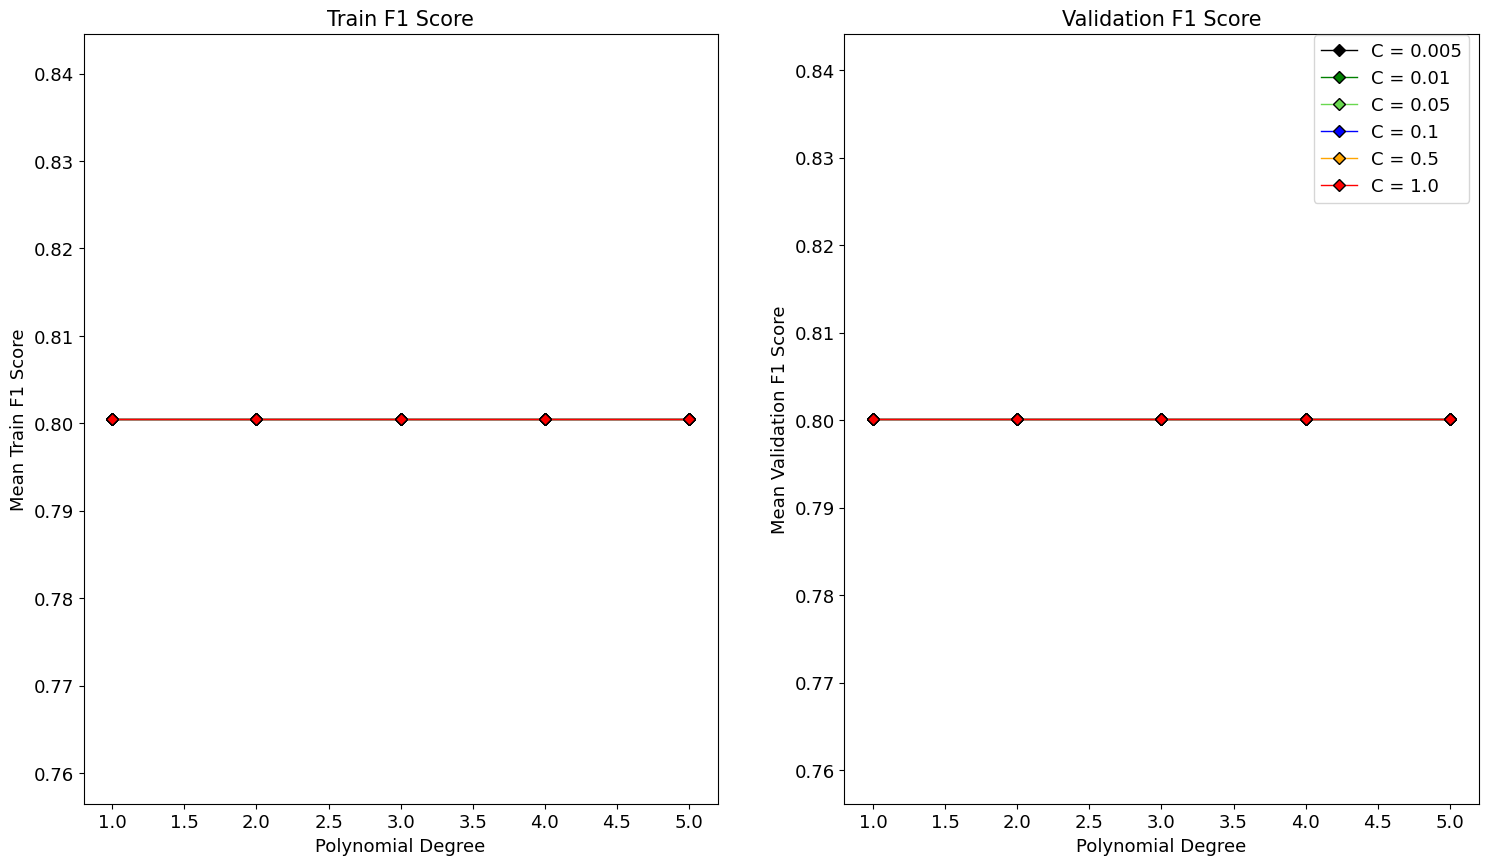

In [ ]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 10
fig10 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1 Score' ,  fontsize = 15)
axs[1].set_title('Validation F1 Score' ,  fontsize = 15)

axs[0].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svm_poly:
    ind = svc_poly_results_svr_rfecv.loc[svc_poly_results_svr_rfecv['param_C'] == i]
    axs[0].plot(ind['param_degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svm_poly:
    ind = svc_poly_results_svr_rfecv.loc[svc_poly_results_svr_rfecv['param_C'] == i]
    axs[1].plot(ind['param_degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### Original Data

In [346]:
svc_poly_Optimize_original_data = GridSearchCV(svm_poly, param_grid_svc_poly, cv=StKFold, return_train_score=True, verbose=3, scoring='f1')
svc_poly_Optimize_original_data.fit(x_train,y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV 1/4] END C=0.005, degree=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/4] END C=0.005, degree=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 3/4] END C=0.005, degree=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 4/4] END C=0.005, degree=1;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/4] END C=0.005, degree=2;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END C=0.005, degree=2;, score=(train=0.806, test=0.783) total time=   0.0s
[CV 3/4] END C=0.005, degree=2;, score=(train=0.788, test=0.838) total time=   0.0s
[CV 4/4] END C=0.005, degree=2;, score=(train=0.802, test=0.795) total time=   0.0s
[CV 1/4] END C=0.005, degree=3;, score=(train=0.817, test=0.780) total time=   0.0s
[CV 2/4] END C=0.005, degree=3;, score=(train=0.804, test=0.807) total time=   0.0s
[CV 3/4] END C=0.005, degree=3;, score=(train=0.806, test=0.831) total time=   0.0s
[CV 4/4] END C

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(kernel='poly'),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'degree': [1, 2, 3, 4, 5]},
             return_train_score=True, scoring='f1', verbose=3)

In [347]:
svc_poly_results_original_data = pd.DataFrame(svc_poly_Optimize_original_data.cv_results_)
Best_Val_Score_svc_poly_original_data = svc_poly_Optimize_original_data.best_score_
print(Best_Val_Score_svc_poly_original_data)
Best_Params_svc_poly_original_data = svc_poly_Optimize_original_data.best_params_
print(Best_Params_svc_poly_original_data)

0.8093253578128968
{'C': 0.01, 'degree': 5}


In [348]:
Best_Estimator_svc_poly_original_data = svc_poly_Optimize_original_data.best_estimator_
F1_Test_Score_svc_poly_original_data = f1_score(y_test,Best_Estimator_svc_poly_original_data.predict(x_test))
Confusion_Matrix_svc_poly_original_data = confusion_matrix(y_test,Best_Estimator_svc_poly_original_data.predict(x_test))
print('SVC_poly f1-score for Original Data: ',F1_Test_Score_svc_poly_original_data)
print('SVC_poly Confusion Matrix for Original Data: \n',Confusion_Matrix_svc_poly_original_data)

SVC_poly f1-score for Original Data:  0.8205128205128205
SVC_poly Confusion Matrix for Original Data: 
 [[232  31]
 [ 18 112]]


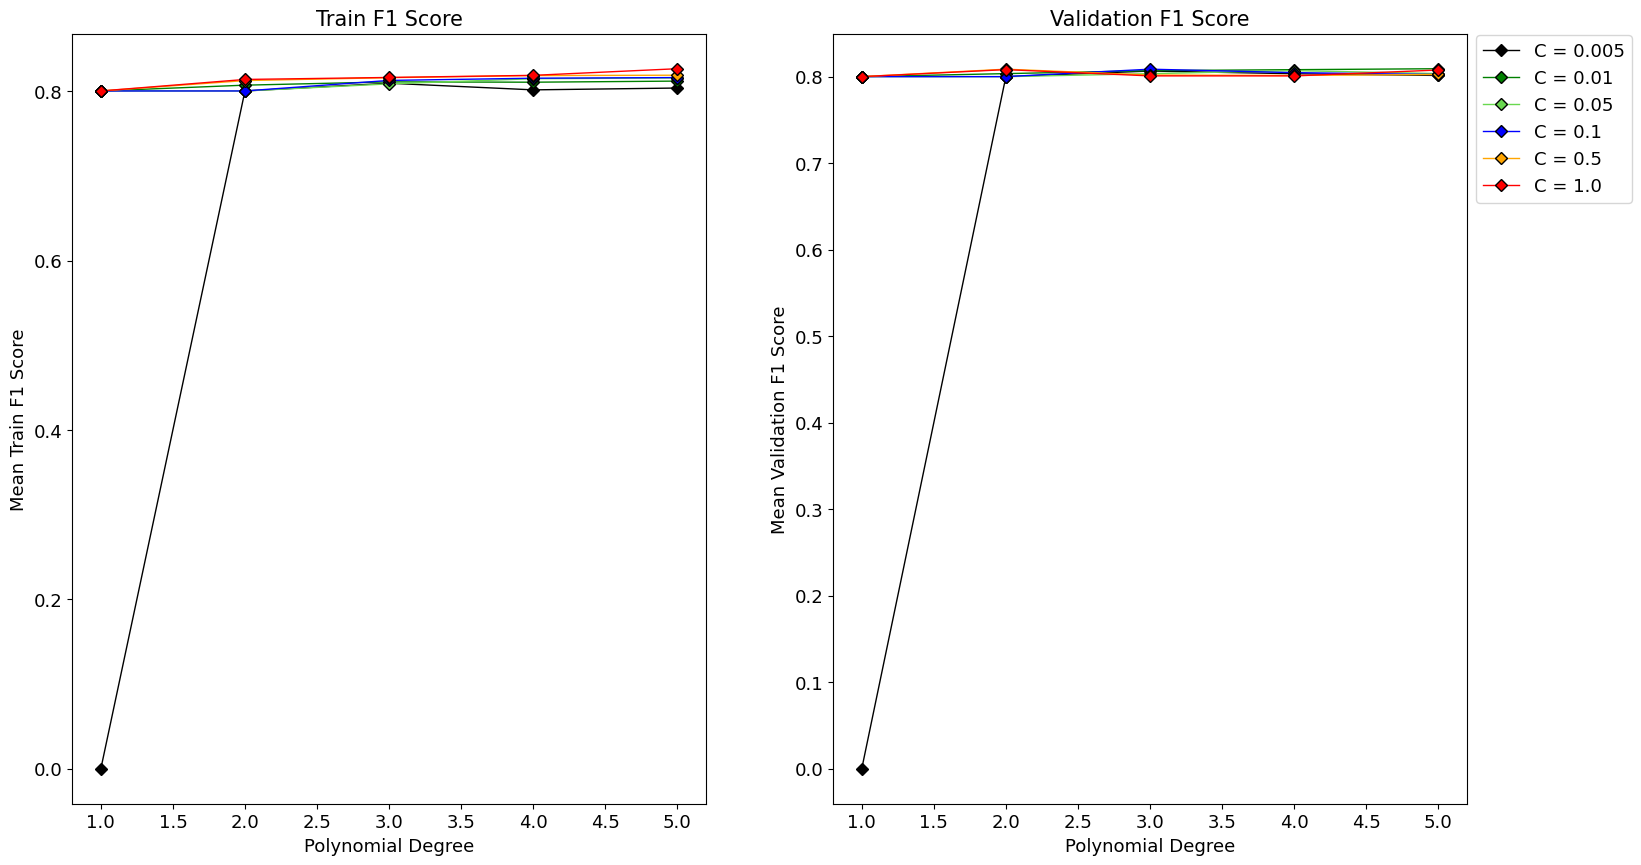

In [ ]:
##Plot

C = [5*10**-3, 10**-2, 5*10**-2, 2*10**-1, 5*10**-1, 1.0, 10]
polynomial_degree = [1,2,3,4,5]

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 11
fig11 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1 Score' ,  fontsize = 15)
axs[1].set_title('Validation F1 Score' ,  fontsize = 15)

axs[0].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Polynomial Degree' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svm_poly:
    ind = svc_poly_results_original_data.loc[svc_poly_results_original_data['param_C'] == i]
    axs[0].plot(ind['param_degree'],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svm_poly:
    ind = svc_poly_results_original_data.loc[svc_poly_results_original_data['param_C'] == i]
    axs[1].plot(ind['param_degree'],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})
#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

In [ ]:
Information_df['C_SVM_Poly'] =[Best_Params_svc_poly_RF_FI['C'],Best_Params_svc_poly_sfs_svr['C'],Best_Params_svc_poly_svr_rfecv['C'],Best_Params_svc_poly_original_data['C']]
Information_df['Degree_SVM_Poly'] =[Best_Params_svc_poly_RF_FI['degree'],Best_Params_svc_poly_sfs_svr['degree'], Best_Params_svc_poly_svr_rfecv['degree'],Best_Params_svc_poly_original_data['degree']]
Information_df['Best Val Score SVM Poly'] = [Best_Val_Score_svc_poly_RF_FI,Best_Val_Score_svc_poly_sfs_svr,Best_Val_Score_svc_poly_svr_rfecv,Best_Val_Score_svc_poly_original_data]
Information_df['Test f1-Score SVM Poly'] =  [F1_Test_Score_svc_poly_RF_FI, F1_Test_Score_svc_poly_sfs_svr, F1_Test_Score_svc_poly_svr_rfecv, F1_Test_Score_svc_poly_original_data]
Information_df

,Name,Features,Num Of Features,C_LR,Degree_LR,Best Val Score LR,Test f1-Score LR,N neighbors,Best Val Score KNN,Test f1-Score KNN,C_SVM_Poly,Degree_SVM_Poly,Best Val Score SVM Poly,Test f1-Score SVM Poly
0,RF Feature Importance,"[[Sex, FamilySize, Title_Miss, Title_Mr, Title...",8,1.000,4,0.814422,0.824427,6,0.817449,0.820717,0.500,3,0.812966,0.819549
1,SFS SVC,"[[Sex, FamilySize, Embarked_C, Title_Master, T...",6,1.000,1,0.813492,0.820896,5,0.813636,0.769874,1.000,3,0.810037,0.818182
2,SVC RFECV,[[Sex]],1,0.005,2,0.800167,0.806084,3,0.800167,0.806084,0.005,1,0.800167,0.806084
3,Original Data,"[[Sex, FamilySize, Embarked_C, Embarked_Q, Emb...",15,1.000,1,0.812326,0.816479,5,0.827580,0.793893,0.010,5,0.809325,0.820513


## SVM RBF

In [361]:
svm_rbf = SVC(kernel='rbf' ,max_iter=-1)

C_svm_rbf = [5*10**-3, 10**-2, 5*10**-2, 10**-1, 5*10**-1, 1.0]
gamma_svm_rbf = ['auto', 'scale', 0.5 , 1, 2 , 5]

param_grid_svc_rbf ={
        'C':  C_svm_rbf,
        'gamma': gamma_svm_rbf
}

#### Random Forest Feature Importance

In [362]:
svc_rbf_Optimize_RF_FI = GridSearchCV(svm_rbf, param_grid_svc_rbf, cv=StKFold, return_train_score=True, verbose=2, scoring='f1')
svc_rbf_Optimize_RF_FI.fit(x_train_rf_feature_impor, y_train_rf_feature_impor)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.0

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'gamma': ['auto', 'scale', 0.5, 1, 2, 5]},
             return_train_score=True, scoring='f1', verbose=2)

In [363]:
svc_rbf_results_RF_FI = pd.DataFrame(svc_rbf_Optimize_RF_FI.cv_results_)
Best_Val_Score_svc_rbf_RF_FI = svc_rbf_Optimize_RF_FI.best_score_
print(Best_Val_Score_svc_rbf_RF_FI)
Best_Params_svc_rbf_RF_FI = svc_rbf_Optimize_RF_FI.best_params_
print(Best_Params_svc_rbf_RF_FI)

0.8147237068969224
{'C': 1.0, 'gamma': 2}


In [364]:
Best_Estimator_svc_rbf_RF_FI = svc_rbf_Optimize_RF_FI.best_estimator_
F1_Test_Score_svc_rbf_RF_FI = f1_score(y_test_rf_feature_impor,Best_Estimator_svc_rbf_RF_FI.predict(x_test_rf_feature_impor))
Confusion_Matrix_svc_rbf_RF_FI = confusion_matrix(y_test_rf_feature_impor,Best_Estimator_svc_rbf_RF_FI.predict(x_test_rf_feature_impor))
print('SVC_RBF f1-score for RF_FI Data: ',F1_Test_Score_svc_rbf_RF_FI)
print('SVC_RBF Confusion Matrix for RF_FI Data: \n',Confusion_Matrix_svc_rbf_RF_FI)

SVC_RBF f1-score for RF_FI Data:  0.8212927756653993
SVC_RBF Confusion Matrix for RF_FI Data: 
 [[238  25]
 [ 22 108]]


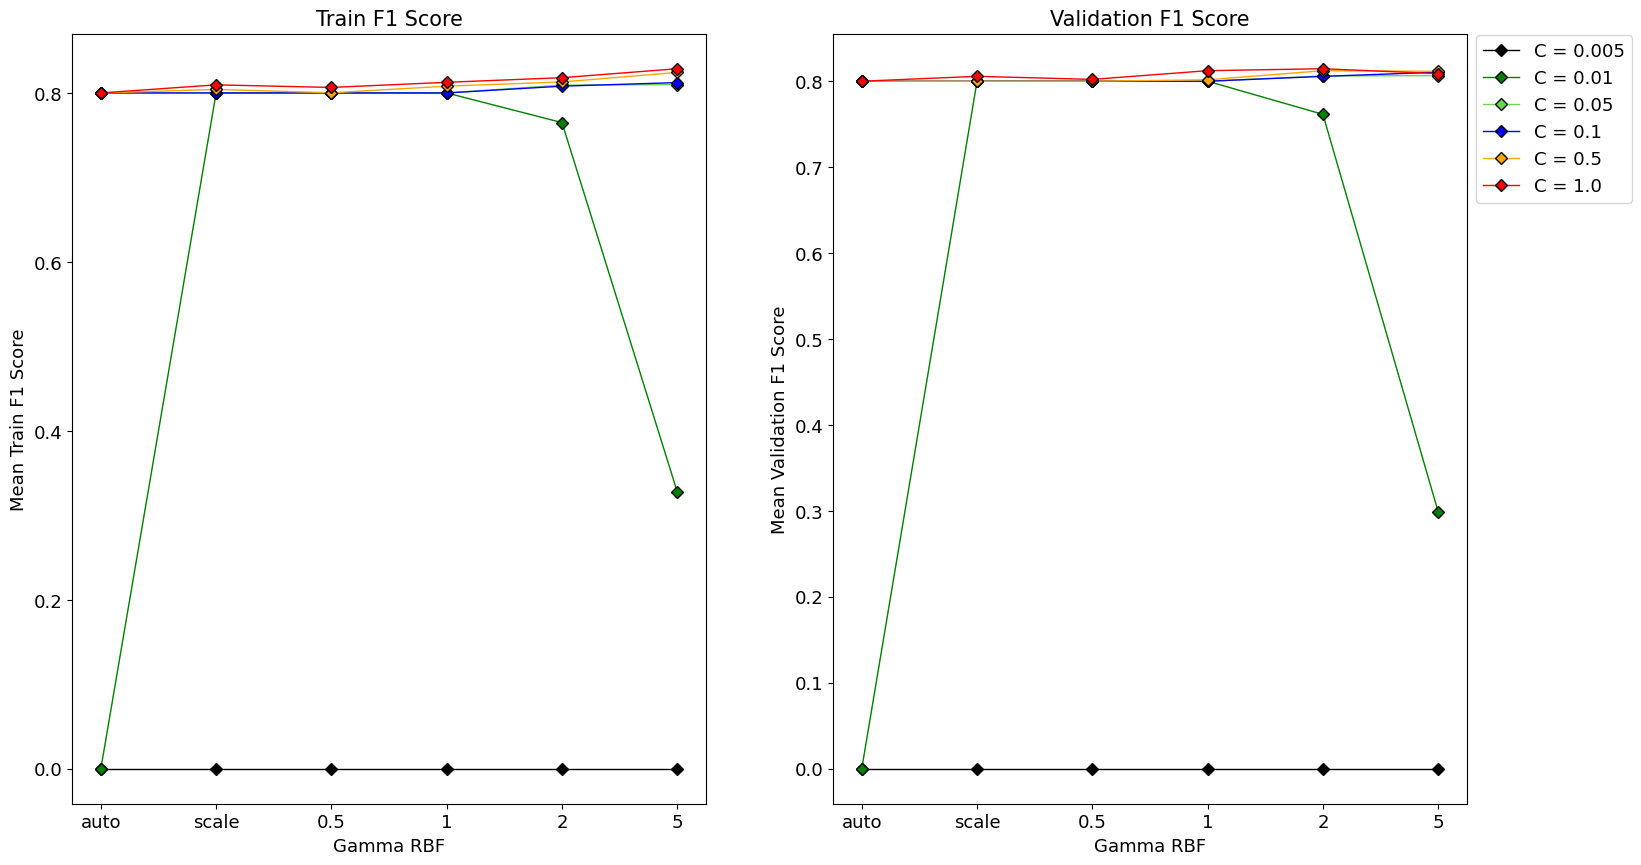

In [ ]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 12
fig12 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1 Score' ,  fontsize = 15)
axs[1].set_title('Validation F1 Score' ,  fontsize = 15)

axs[0].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svm_rbf:
    ind = svc_rbf_results_RF_FI.loc[svc_rbf_results_RF_FI['param_C'] == i]
    axs[0].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svm_rbf:
    ind = svc_rbf_results_RF_FI.loc[svc_rbf_results_RF_FI['param_C'] == i]
    axs[1].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### sfs svr

In [375]:
svc_rbf_Optimize_sfs_svr = GridSearchCV(svm_rbf, param_grid_svc_rbf, cv=StKFold, return_train_score=True, verbose=2, scoring='f1')
svc_rbf_Optimize_sfs_svr.fit(x_train_sfs_svr,y_train_sfs_svr)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.0

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'gamma': ['auto', 'scale', 0.5, 1, 2, 5]},
             return_train_score=True, scoring='f1', verbose=2)

In [376]:
svc_rbf_results_sfs_svr = pd.DataFrame(svc_rbf_Optimize_sfs_svr.cv_results_)
Best_Val_Score_svc_rbf_sfs_svr = svc_rbf_Optimize_sfs_svr.best_score_
print(Best_Val_Score_svc_rbf_sfs_svr)
Best_Params_svc_rbf_sfs_svr = svc_rbf_Optimize_sfs_svr.best_params_
print(Best_Params_svc_rbf_sfs_svr)

0.8141564398307461
{'C': 0.5, 'gamma': 5}


In [377]:
Best_Estimator_svc_rbf_sfs_svr = svc_rbf_Optimize_sfs_svr.best_estimator_
F1_Test_Score_svc_rbf_sfs_svr = f1_score(y_test_sfs_svr,Best_Estimator_svc_rbf_sfs_svr.predict(x_test_sfs_svr))
Confusion_Matrix_svc_rbf_sfs_svr = confusion_matrix(y_test_sfs_svr,Best_Estimator_svc_rbf_sfs_svr.predict(x_test_sfs_svr))
print('SVC_RBF f1-score for sfs_svr Data: ',F1_Test_Score_svc_rbf_sfs_svr)
print('SVC_RBF Confusion Matrix for sfs_svr Data: \n',Confusion_Matrix_svc_rbf_sfs_svr)

SVC_RBF f1-score for sfs_svr Data:  0.8275862068965517
SVC_RBF Confusion Matrix for sfs_svr Data: 
 [[240  23]
 [ 22 108]]


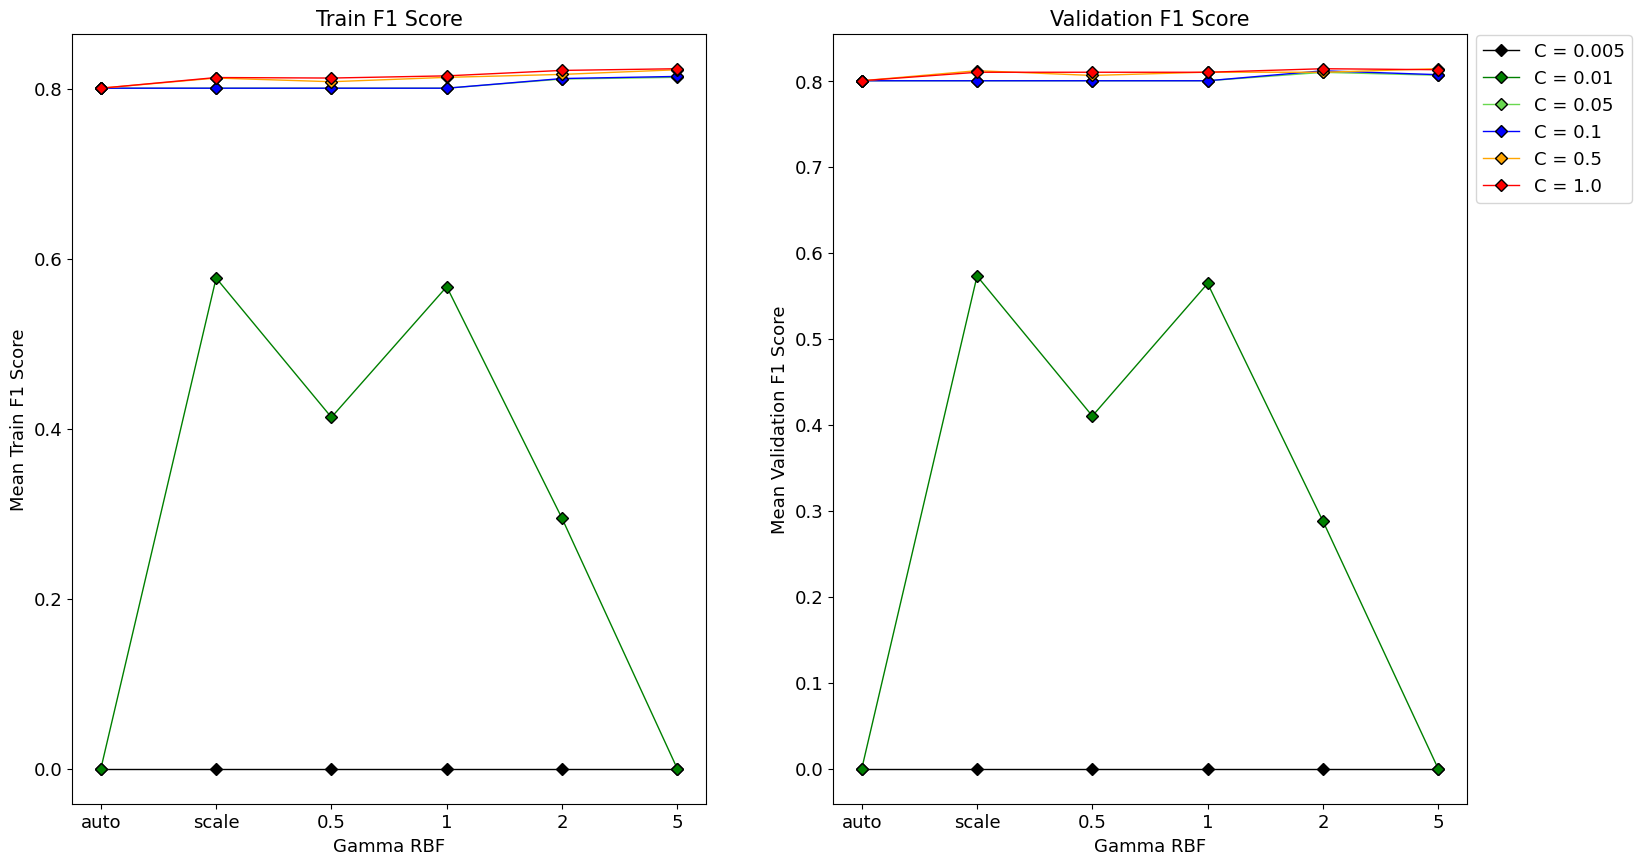

In [ ]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 13
fig13 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1 Score' ,  fontsize = 15)
axs[1].set_title('Validation F1 Score' ,  fontsize = 15)

axs[0].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svm_rbf:
    ind = svc_rbf_results_sfs_svr.loc[svc_rbf_results_sfs_svr['param_C'] == i]
    axs[0].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svm_rbf:
    ind = svc_rbf_results_sfs_svr.loc[svc_rbf_results_sfs_svr['param_C'] == i]
    axs[1].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### svr RFECV

In [380]:
svc_rbf_Optimize_svr_rfecv = GridSearchCV(svm_rbf, param_grid_svc_rbf, cv=StKFold, return_train_score=True, verbose=2, scoring='f1')
svc_rbf_Optimize_svr_rfecv.fit(x_train_svr_rfecv,y_train_svr_rfecv)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.0

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'gamma': ['auto', 'scale', 0.5, 1, 2, 5]},
             return_train_score=True, scoring='f1', verbose=2)

In [381]:
svc_rbf_results_svr_rfecv = pd.DataFrame(svc_rbf_Optimize_svr_rfecv.cv_results_)
Best_Val_Score_svc_rbf_svr_rfecv = svc_rbf_Optimize_svr_rfecv.best_score_
print(Best_Val_Score_svc_rbf_svr_rfecv)
Best_Params_svc_rbf_svr_rfecv = svc_rbf_Optimize_svr_rfecv.best_params_
print(Best_Params_svc_rbf_svr_rfecv)

0.8001667028703947
{'C': 0.005, 'gamma': 'auto'}


In [382]:
Best_Estimator_svc_rbf_svr_rfecv = svc_rbf_Optimize_svr_rfecv.best_estimator_
F1_Test_Score_svc_rbf_svr_rfecv = f1_score(y_test_svr_rfecv,Best_Estimator_svc_rbf_svr_rfecv.predict(x_test_svr_rfecv))
Confusion_Matrix_svc_rbf_svr_rfecv = confusion_matrix(y_test_svr_rfecv,Best_Estimator_svc_rbf_svr_rfecv.predict(x_test_svr_rfecv))
print('SVC_RBF f1-score for svr_rfecv Data: ',F1_Test_Score_svc_rbf_svr_rfecv)
print('SVC_RBF Confusion Matrix for svr_rfecv Data: \n',Confusion_Matrix_svc_rbf_svr_rfecv)

SVC_RBF f1-score for svr_rfecv Data:  0.8060836501901141
SVC_RBF Confusion Matrix for svr_rfecv Data: 
 [[236  27]
 [ 24 106]]


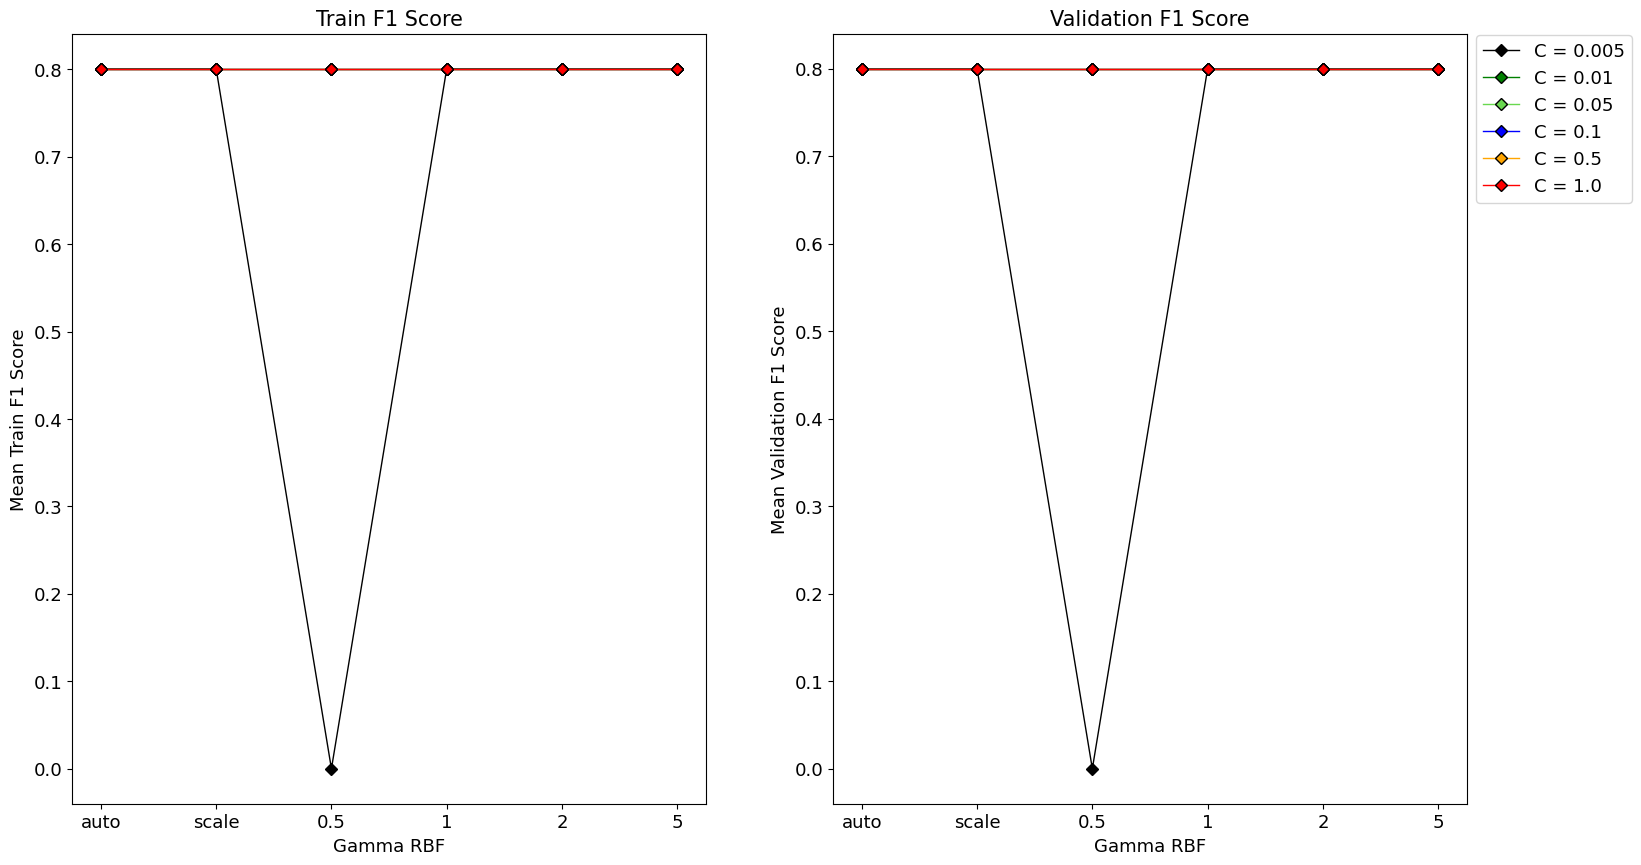

In [ ]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 14
fig14 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1 Score' ,  fontsize = 15)
axs[1].set_title('Validation F1 Score' ,  fontsize = 15)

axs[0].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svm_rbf:
    ind = svc_rbf_results_svr_rfecv.loc[svc_rbf_results_svr_rfecv['param_C'] == i]
    axs[0].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svm_rbf:
    ind = svc_rbf_results_svr_rfecv.loc[svc_rbf_results_svr_rfecv['param_C'] == i]
    axs[1].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

#### Original Data

In [384]:
svc_rbf_Optimize_original_data = GridSearchCV(svm_rbf, param_grid_svc_rbf, cv=StKFold, return_train_score=True, verbose=2, scoring='f1')
svc_rbf_Optimize_original_data.fit(x_train,y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ................................C=0.005, gamma=auto; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END ...............................C=0.005, gamma=scale; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.005, gamma=0.5; total time=   0.0s
[CV] END .................................C=0.0

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
                         'gamma': ['auto', 'scale', 0.5, 1, 2, 5]},
             return_train_score=True, scoring='f1', verbose=2)

In [385]:
svc_rbf_results_original_data = pd.DataFrame(svc_rbf_Optimize_original_data.cv_results_)
Best_Val_Score_svc_rbf_original_data = svc_rbf_Optimize_original_data.best_score_
print(Best_Val_Score_svc_rbf_original_data)
Best_Params_svc_rbf_original_data = svc_rbf_Optimize_original_data.best_params_
print(Best_Params_svc_rbf_original_data)

0.8095763344739341
{'C': 1.0, 'gamma': 2}


In [386]:
Best_Estimator_svc_rbf_original_data = svc_rbf_Optimize_original_data.best_estimator_
F1_Test_Score_svc_rbf_original_data = f1_score(y_test,Best_Estimator_svc_rbf_original_data.predict(x_test))
Confusion_Matrix_svc_rbf_original_data = confusion_matrix(y_test,Best_Estimator_svc_rbf_original_data.predict(x_test))
print('SVC_RBF f1-score for Original Data: ',F1_Test_Score_svc_rbf_original_data)
print('SVC_RBF Confusion Matrix for Original Data: \n',Confusion_Matrix_svc_rbf_original_data)

SVC_RBF f1-score for Original Data:  0.8275862068965517
SVC_RBF Confusion Matrix for Original Data: 
 [[240  23]
 [ 22 108]]


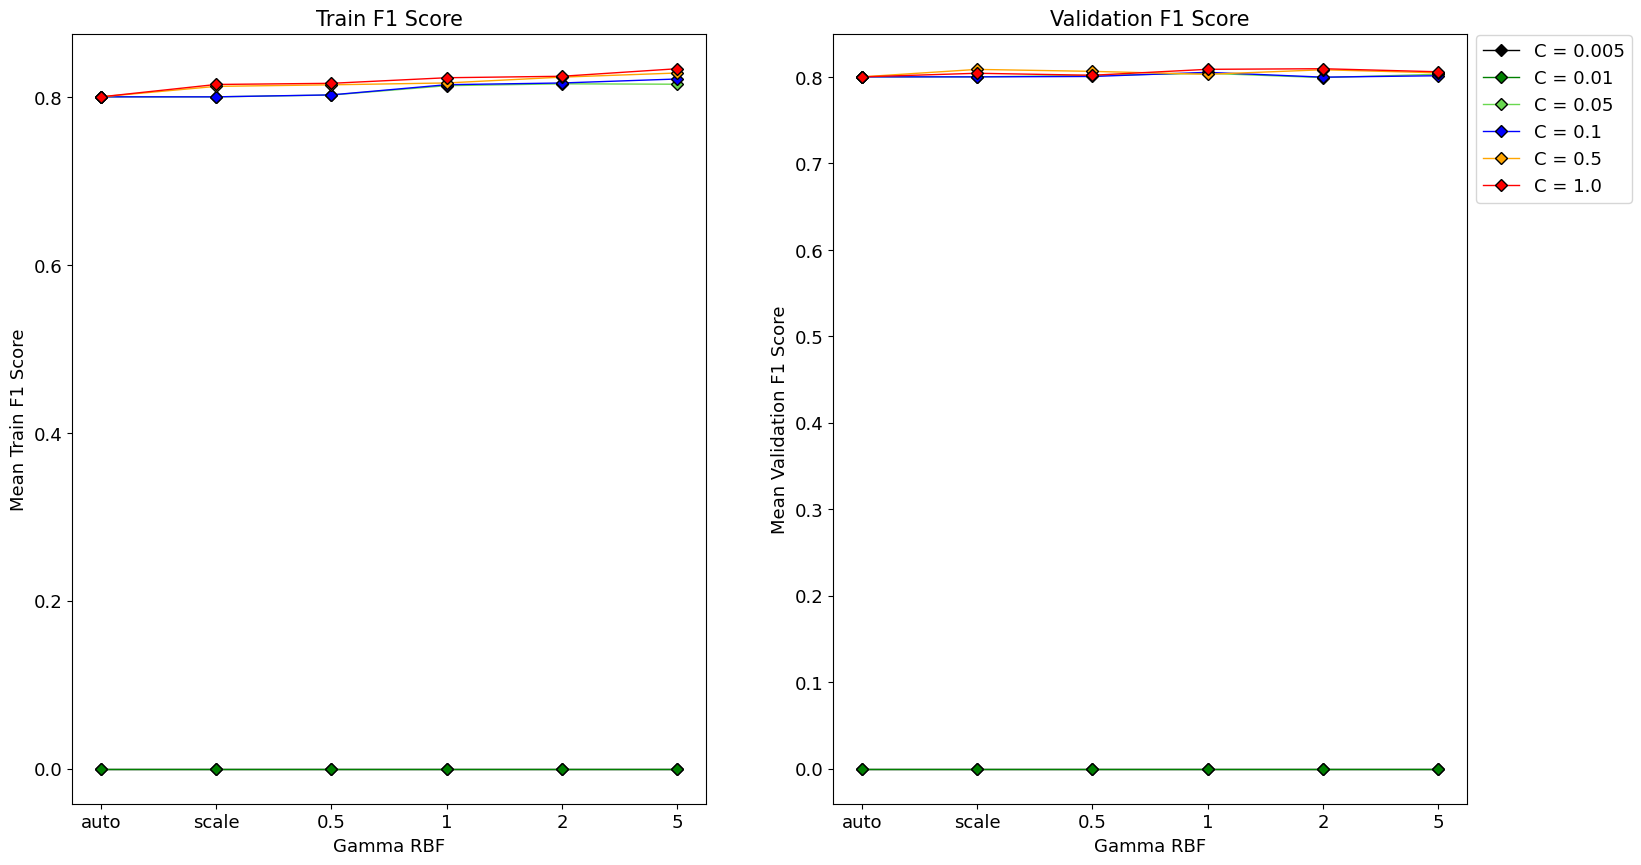

In [ ]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['black' , 'green' , 'xkcd:fresh green' , 'blue' , 'orange' , 'red' , 'brown' , 'purple' , 'xkcd:dark yellow' ,
                'xkcd:dark blue' , 'pink' , 'xkcd:dark red']
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    
#Figure 15
fig15 , axs = plt.subplots(1, 2, figsize=(18,10) , dpi=100)

axs[0].set_title('Train F1 Score' ,  fontsize = 15)
axs[1].set_title('Validation F1 Score' ,  fontsize = 15)

axs[0].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[0].set_ylabel('Mean Train F1 Score' ,  fontsize = 13)


axs[1].set_xlabel('Gamma RBF' ,  fontsize = 13)
axs[1].set_ylabel('Mean Validation F1 Score' ,  fontsize = 13)

#Train Plot 

j = 0;
for i in C_svm_rbf:
    ind = svc_rbf_results_original_data.loc[svc_rbf_results_original_data['param_C'] == i]
    axs[0].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_train_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1
    
 
#Test Plot

j = 0;
for i in C_svm_rbf:
    ind = svc_rbf_results_original_data.loc[svc_rbf_results_original_data['param_C'] == i]
    axs[1].plot([str(s_g) for s_g in ind['param_gamma']],ind['mean_test_score'], color = colors_plot[j] , marker = 'D', mec = 'k', 
         label='C = '+str(i), linewidth= 1)
    j = j + 1


   
axs[1].legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})

#Save And Show
#plt.savefig('E:\\Machine_Learning_Paper\\SVM_P_Parameters_F1_Score_5Kfold.png')
plt.show()

In [437]:
Information_df['C_SVM_RBF'] =[Best_Params_svc_rbf_RF_FI['C'], Best_Params_svc_rbf_sfs_svr['C'], Best_Params_svc_rbf_svr_rfecv['C'], Best_Params_svc_rbf_original_data['C']]
Information_df['Gamma_SVM_RBF'] =[Best_Params_svc_rbf_RF_FI['gamma'], Best_Params_svc_rbf_sfs_svr['gamma'], Best_Params_svc_rbf_svr_rfecv['gamma'], Best_Params_svc_rbf_original_data['gamma']]
Information_df['Best Val Score SVM RBF'] = [Best_Val_Score_svc_rbf_RF_FI,Best_Val_Score_svc_rbf_sfs_svr,Best_Val_Score_svc_rbf_svr_rfecv,Best_Val_Score_svc_rbf_original_data]
Information_df['Test f1-Score SVM RBF'] =  [F1_Test_Score_svc_rbf_RF_FI, F1_Test_Score_svc_rbf_sfs_svr, F1_Test_Score_svc_rbf_svr_rfecv, F1_Test_Score_svc_rbf_original_data]
Information_df

,Name,Features,Num Of Features,C_LR,Degree_LR,Best Val Score LR,Test f1-Score LR,N neighbors,Best Val Score KNN,Test f1-Score KNN,C_SVM_Poly,Degree_SVM_Poly,Best Val Score SVM Poly,Test f1-Score SVM Poly,C_SVM_RBF,Gamma_SVM_RBF,Best Val Score SVM RBF,Test f1-Score SVM RBF
0,RF Feature Importance,"[[Sex, FamilySize, Title_Miss, Title_Mr, Title...",8,1.000,4,0.814422,0.824427,6,0.817449,0.820717,0.500,3,0.812966,0.819549,1.000,2,0.814724,0.821293
1,SFS SVC,"[[Sex, FamilySize, Embarked_C, Title_Master, T...",6,1.000,1,0.813492,0.820896,5,0.813636,0.769874,1.000,3,0.810037,0.818182,0.500,5,0.814156,0.827586
2,SVC RFECV,[[Sex]],1,0.005,2,0.800167,0.806084,3,0.800167,0.806084,0.005,1,0.800167,0.806084,0.005,auto,0.800167,0.806084
3,Original Data,"[[Sex, FamilySize, Embarked_C, Embarked_Q, Emb...",15,1.000,1,0.812326,0.816479,5,0.827580,0.793893,0.010,5,0.809325,0.820513,1.000,2,0.809576,0.827586


# Random Forest

In [388]:
RF_model = RandomForestClassifier(criterion = 'entropy')

n_estimators_RF = np.arange(start=10, stop=101, step=10)
R_S = np.arange(start=0, stop=50, step=10)

param_grid_RF = {
    'n_estimators':n_estimators_RF,
    'random_state':R_S,
    'min_samples_split':[0.1,0.25],
    'max_depth':[3,5,8]
}

#### Random Forest Feature Importance

In [390]:
RF_Optimize_RF_FI = GridSearchCV(RF_model, param_grid_RF, cv=StKFold, return_train_score=True, verbose=3, scoring='f1')
RF_Optimize_RF_FI.fit(x_train_UnNor_rf_feature_impor, y_train_rf_feature_impor)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
[CV 1/4] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0;, score=(train=0.813, test=0.798) total time=   0.0s
[CV 3/4] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0;, score=(train=0.800, test=0.844) total time=   0.0s
[CV 4/4] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0;, score=(train=0.817, test=0.793) total time=   0.0s
[CV 1/4] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10;, score=(train=0.806, test=0.784) total time=   0.0s
[CV 2/4] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10;, score=(train=0.813, test=0.790) total time=   0.0s
[CV 3/4] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10;, score=(train=0.788, test=0.838) total time=   

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [3, 5, 8],
                         'min_samples_split': [0.1, 0.25],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                         'random_state': array([ 0, 10, 20, 30, 40])},
             return_train_score=True, scoring='f1', verbose=3)

In [391]:
RF_results_RF_FI = pd.DataFrame(RF_Optimize_RF_FI.cv_results_)
Best_Val_Score_RF_RF_FI = RF_Optimize_RF_FI.best_score_
print(Best_Val_Score_RF_RF_FI)
Best_Params_RF_RF_FI = RF_Optimize_RF_FI.best_params_
print(Best_Params_RF_RF_FI)

0.8164866373737604
{'max_depth': 5, 'min_samples_split': 0.1, 'n_estimators': 10, 'random_state': 40}


In [392]:
Best_Estimator_RF_RF_FI = RF_Optimize_RF_FI.best_estimator_
F1_Test_Score_RF_RF_FI = f1_score(y_test_rf_feature_impor,Best_Estimator_RF_RF_FI.predict(x_test_UnNor_rf_feature_impor))
Confusion_Matrix_RF_RF_FI = confusion_matrix(y_test_rf_feature_impor,Best_Estimator_RF_RF_FI.predict(x_test_UnNor_rf_feature_impor))
print('RF f1-score for RF_FI Data: ',F1_Test_Score_RF_RF_FI)
print('RF Confusion Matrix for RF_FI Data: \n',Confusion_Matrix_RF_RF_FI)

RF f1-score for RF_FI Data:  0.816793893129771
RF Confusion Matrix for RF_FI Data: 
 [[238  25]
 [ 23 107]]


#### sfs svr

In [393]:
RF_Optimize_sfs_svr = GridSearchCV(RF_model, param_grid_RF, cv=StKFold, return_train_score=True, verbose=2, scoring='f1')
RF_Optimize_sfs_svr.fit(x_train_UnNor_sfs_svr,y_train_sfs_svr)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=20; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [3, 5, 8],
                         'min_samples_split': [0.1, 0.25],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                         'random_state': array([ 0, 10, 20, 30, 40])},
             return_train_score=True, scoring='f1', verbose=2)

In [394]:
RF_results_sfs_svr = pd.DataFrame(RF_Optimize_sfs_svr.cv_results_)
Best_Val_Score_RF_sfs_svr = RF_Optimize_sfs_svr.best_score_
print(Best_Val_Score_RF_sfs_svr)
Best_Params_RF_sfs_svr = RF_Optimize_sfs_svr.best_params_
print(Best_Params_RF_sfs_svr)

0.8158963788155463
{'max_depth': 8, 'min_samples_split': 0.1, 'n_estimators': 40, 'random_state': 20}


In [395]:
Best_Estimator_RF_sfs_svr = RF_Optimize_sfs_svr.best_estimator_
F1_Test_Score_RF_sfs_svr = f1_score(y_test_sfs_svr,Best_Estimator_RF_sfs_svr.predict(x_test_UnNor_sfs_svr))
Confusion_Matrix_RF_sfs_svr = confusion_matrix(y_test_sfs_svr,Best_Estimator_RF_sfs_svr.predict(x_test_UnNor_sfs_svr))
print('RF f1-score for sfs_svr Data: ',F1_Test_Score_RF_sfs_svr)
print('RF Confusion Matrix for sfs_svr Data: \n',Confusion_Matrix_RF_sfs_svr)

RF f1-score for sfs_svr Data:  0.833976833976834
RF Confusion Matrix for sfs_svr Data: 
 [[242  21]
 [ 22 108]]


#### svr RFECV

In [397]:
RF_Optimize_svr_rfecv = GridSearchCV(RF_model, param_grid_RF, cv=StKFold, return_train_score=True, verbose=2, scoring='f1')
RF_Optimize_svr_rfecv.fit(x_train_UnNor_svr_rfecv,y_train_svr_rfecv)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=20; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [3, 5, 8],
                         'min_samples_split': [0.1, 0.25],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                         'random_state': array([ 0, 10, 20, 30, 40])},
             return_train_score=True, scoring='f1', verbose=2)

In [398]:
RF_results_svr_rfecv = pd.DataFrame(RF_Optimize_svr_rfecv.cv_results_)
Best_Val_Score_RF_svr_rfecv = RF_Optimize_svr_rfecv.best_score_
print(Best_Val_Score_RF_svr_rfecv)
Best_Params_RF_svr_rfecv = RF_Optimize_svr_rfecv.best_params_
print(Best_Params_RF_svr_rfecv)

0.8001667028703947
{'max_depth': 3, 'min_samples_split': 0.1, 'n_estimators': 10, 'random_state': 0}


In [400]:
Best_Estimator_RF_svr_rfecv = RF_Optimize_svr_rfecv.best_estimator_
F1_Test_Score_RF_svr_rfecv = f1_score(y_test_svr_rfecv,Best_Estimator_RF_svr_rfecv.predict(x_test_UnNor_svr_rfecv))
Confusion_Matrix_RF_svr_rfecv = confusion_matrix(y_test_svr_rfecv,Best_Estimator_RF_svr_rfecv.predict(x_test_UnNor_svr_rfecv))
print('RF f1-score for svr_rfecv Data: ',F1_Test_Score_RF_svr_rfecv)
print('RF Confusion Matrix for svr_rfecv Data: \n',Confusion_Matrix_RF_svr_rfecv)

RF f1-score for svr_rfecv Data:  0.8060836501901141
RF Confusion Matrix for svr_rfecv Data: 
 [[236  27]
 [ 24 106]]


#### Original Data

In [401]:
RF_Optimize_original_data = GridSearchCV(RF_model, param_grid_RF, cv=StKFold, return_train_score=True, verbose=2, scoring='f1')
RF_Optimize_original_data.fit(x_train_UnNor,y_train)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=0; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=10; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=10, random_state=20; total time=   0.0s
[CV] END max_depth=3, min_samples_split=0.1, n_estimators=

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [3, 5, 8],
                         'min_samples_split': [0.1, 0.25],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                         'random_state': array([ 0, 10, 20, 30, 40])},
             return_train_score=True, scoring='f1', verbose=2)

In [402]:
RF_results_original_data = pd.DataFrame(RF_Optimize_original_data.cv_results_)
Best_Val_Score_RF_original_data = RF_Optimize_original_data.best_score_
print(Best_Val_Score_RF_original_data)
Best_Params_RF_original_data = RF_Optimize_original_data.best_params_
print(Best_Params_RF_original_data)

0.8157515569368532
{'max_depth': 3, 'min_samples_split': 0.25, 'n_estimators': 10, 'random_state': 0}


In [403]:
Best_Estimator_RF_original_data = RF_Optimize_original_data.best_estimator_
F1_Test_Score_RF_original_data = f1_score(y_test,Best_Estimator_RF_original_data.predict(x_test_UnNor))
Confusion_Matrix_RF_original_data = confusion_matrix(y_test,Best_Estimator_RF_original_data.predict(x_test_UnNor))
print('RF f1-score for Original Data: ',F1_Test_Score_RF_original_data)
print('RF Confusion Matrix for Original Data: \n',Confusion_Matrix_RF_original_data)

RF f1-score for Original Data:  0.7943262411347518
RF Confusion Matrix for Original Data: 
 [[223  40]
 [ 18 112]]


In [438]:
Information_df['N Estimators'] =[Best_Params_RF_RF_FI['n_estimators'],Best_Params_RF_sfs_svr['n_estimators'], Best_Params_RF_svr_rfecv['n_estimators'], Best_Params_RF_original_data['n_estimators']]
Information_df['Random State'] =[Best_Params_RF_RF_FI['random_state'],Best_Params_RF_sfs_svr['random_state'], Best_Params_RF_svr_rfecv['random_state'],Best_Params_RF_original_data['random_state']]
Information_df['min samples split'] =[Best_Params_RF_RF_FI['min_samples_split'],Best_Params_RF_sfs_svr['min_samples_split'], Best_Params_RF_svr_rfecv['min_samples_split'], Best_Params_RF_original_data['min_samples_split']]
Information_df['max_depth'] =[Best_Params_RF_RF_FI['max_depth'],Best_Params_RF_sfs_svr['max_depth'], Best_Params_RF_svr_rfecv['max_depth'], Best_Params_RF_original_data['max_depth']]
Information_df['Best Val Score RF'] = [Best_Val_Score_RF_RF_FI, Best_Val_Score_RF_sfs_svr, Best_Val_Score_RF_svr_rfecv, Best_Val_Score_RF_original_data]
Information_df['Test f1-Score RF'] =  [F1_Test_Score_RF_RF_FI, F1_Test_Score_RF_sfs_svr, F1_Test_Score_RF_svr_rfecv, F1_Test_Score_RF_original_data]
Information_df


,Name,Features,Num Of Features,C_LR,Degree_LR,Best Val Score LR,Test f1-Score LR,N neighbors,Best Val Score KNN,Test f1-Score KNN,...,C_SVM_RBF,Gamma_SVM_RBF,Best Val Score SVM RBF,Test f1-Score SVM RBF,N Estimators,Random State,min samples split,max_depth,Best Val Score RF,Test f1-Score RF
0,RF Feature Importance,"[[Sex, FamilySize, Title_Miss, Title_Mr, Title...",8,1.000,4,0.814422,0.824427,6,0.817449,0.820717,...,1.000,2,0.814724,0.821293,10,40,0.10,5,0.816487,0.816794
1,SFS SVC,"[[Sex, FamilySize, Embarked_C, Title_Master, T...",6,1.000,1,0.813492,0.820896,5,0.813636,0.769874,...,0.500,5,0.814156,0.827586,40,20,0.10,8,0.815896,0.833977
2,SVC RFECV,[[Sex]],1,0.005,2,0.800167,0.806084,3,0.800167,0.806084,...,0.005,auto,0.800167,0.806084,10,0,0.10,3,0.800167,0.806084
3,Original Data,"[[Sex, FamilySize, Embarked_C, Embarked_Q, Emb...",15,1.000,1,0.812326,0.816479,5,0.827580,0.793893,...,1.000,2,0.809576,0.827586,10,0,0.25,3,0.815752,0.794326


# Neural Networks

In [414]:
def create_model(num_feature, num_hidden_layers, neurons_l1, activations, optimizers, dropout_rate,neurons_l2=None):
    model = Sequential()
    model.add(Input(shape=(num_feature,)))
    
    model.add(Dense(units=neurons_l1, use_bias=False))
    model.add(BatchNormalization())
    model.add(Activation(activations))
    model.add(Dropout(dropout_rate))
    
    if num_hidden_layers == 2 and neurons_l2 is not None:
        model.add(Dense(units=neurons_l2, use_bias=False))
        model.add(BatchNormalization())
        model.add(Activation(activations))
        model.add(Dropout(dropout_rate))

    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer=optimizers, loss='binary_crossentropy', metrics=['accuracy'])

    return model 

#num_feature = x_train_sfs_svr.shape[1]
#NN_model = KerasClassifier(model=create_model, num_feature=num_feature, random_state = 42,verbose=0)

In [415]:
param_grid_NN = [
    # Grid for one-layer models
    {
        'model__num_hidden_layers': [1],
        'model__neurons_l1': np.arange(start=2, stop=13, step=2),
        'model__optimizers': ['adam'],
        'model__activations': ['sigmoid'],
        'model__dropout_rate': [0, 0.2],
        'batch_size': [32],
        'epochs': [100]
    },
    
    # Grid for two-layer models
    {
        'model__num_hidden_layers': [2],
        'model__neurons_l1': np.arange(start=2, stop=13, step=2),
        'model__neurons_l2': np.arange(start=2, stop=13, step=2), 
        'model__optimizers': ['adam'],
        'model__activations': ['sigmoid'],
        'model__dropout_rate': [0, 0.2],
        'batch_size': [32],
        'epochs': [100]
    }
]

#### Random Forest Feature Importance

In [416]:
num_feature = x_train_rf_feature_impor.shape[1]
NN_model = KerasClassifier(model=create_model, num_feature=num_feature, random_state = 42, verbose=0)

NN_Optimize_RF_FI = GridSearchCV(NN_model, param_grid_NN, cv=StKFold, return_train_score=True, verbose=3, scoring='f1')
NN_Optimize_RF_FI.fit(x_train_rf_feature_impor,y_train_rf_feature_impor)

Fitting 4 folds for each of 84 candidates, totalling 336 fits
[CV 1/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.815, test=0.800) total time=   6.0s
[CV 2/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.814, test=0.805) total time=   6.5s
[CV 3/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.798, test=0.840) total time=   6.3s
[CV 4/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.818, test=0.793) total time=   6.3s
[CV 1/4] END batch_size=32, epochs=100, model__activations=sigmoid, model_

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KerasClassifier(model=<function create_model at 0x000002585D1B39C0>, num_feature=8, random_state=42, verbose=0),
             param_grid=[{'batch_size': [32], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.2],
                          'model__neurons_l1': array([ 2,  4,  6,  8, 10, 12]),
                          'model__num_hidden_layers': [1],
                          'model__optimizers': ['adam']},
                         {'batch_size': [32], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.2],
                          'model__neurons_l1': array([ 2,  4,  6,  8, 10, 12]),
                          'model__neurons_l2': array([ 2,  4,  6,  8, 10, 12]),
                          'model__num_hidden_layers': [2],
                          'model__optimizers': ['adam']}],
             return_train_score=True, scoring='f1', verbose=3)

In [417]:
NN_results_RF_FI = pd.DataFrame(NN_Optimize_RF_FI.cv_results_)
Best_Val_Score_NN_RF_FI = NN_Optimize_RF_FI.best_score_
print(Best_Val_Score_NN_RF_FI)
Best_Params_NN_RF_FI = NN_Optimize_RF_FI.best_params_
print(Best_Params_NN_RF_FI)

0.8153262167963322
{'batch_size': 32, 'epochs': 100, 'model__activations': 'sigmoid', 'model__dropout_rate': 0, 'model__neurons_l1': 4, 'model__neurons_l2': 10, 'model__num_hidden_layers': 2, 'model__optimizers': 'adam'}


In [418]:
Best_Estimator_NN_RF_FI = NN_Optimize_RF_FI.best_estimator_
F1_Test_Score_NN_RF_FI = f1_score(y_test_rf_feature_impor,Best_Estimator_NN_RF_FI.predict(x_test_rf_feature_impor))
Confusion_Matrix_NN_RF_FI = confusion_matrix(y_test_rf_feature_impor,Best_Estimator_NN_RF_FI.predict(x_test_rf_feature_impor))
print('NN f1-score for RF_FI Data: ',F1_Test_Score_NN_RF_FI)
print('NN Confusion Matrix for RF_FI Data: \n',Confusion_Matrix_NN_RF_FI)

NN f1-score for RF_FI Data:  0.8106060606060606
NN Confusion Matrix for RF_FI Data: 
 [[236  27]
 [ 23 107]]


#### sfs svr

In [419]:
num_feature = x_train_sfs_svr.shape[1]
NN_model = KerasClassifier(model=create_model, num_feature=num_feature, random_state = 42,verbose=0)

NN_Optimize_sfs_svr = GridSearchCV(NN_model, param_grid_NN, cv=StKFold, return_train_score=True, verbose=3, scoring='f1')
NN_Optimize_sfs_svr.fit(x_train_sfs_svr,y_train_sfs_svr)

Fitting 4 folds for each of 84 candidates, totalling 336 fits
[CV 1/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.813, test=0.800) total time=   6.4s
[CV 2/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.816, test=0.810) total time=   7.0s
[CV 3/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.802, test=0.849) total time=   7.7s
[CV 4/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.818, test=0.804) total time=   7.5s
[CV 1/4] END batch_size=32, epochs=100, model__activations=sigmoid, model_

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KerasClassifier(model=<function create_model at 0x000002585D1B39C0>, num_feature=6, random_state=42, verbose=0),
             param_grid=[{'batch_size': [32], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.2],
                          'model__neurons_l1': array([ 2,  4,  6,  8, 10, 12]),
                          'model__num_hidden_layers': [1],
                          'model__optimizers': ['adam']},
                         {'batch_size': [32], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.2],
                          'model__neurons_l1': array([ 2,  4,  6,  8, 10, 12]),
                          'model__neurons_l2': array([ 2,  4,  6,  8, 10, 12]),
                          'model__num_hidden_layers': [2],
                          'model__optimizers': ['adam']}],
             return_train_score=True, scoring='f1', verbose=3)

In [421]:
NN_results_sfs_svr = pd.DataFrame(NN_Optimize_sfs_svr.cv_results_)
Best_Val_Score_NN_sfs_svr = NN_Optimize_sfs_svr.best_score_
print(Best_Val_Score_NN_sfs_svr)
Best_Params_NN_sfs_svr = NN_Optimize_sfs_svr.best_params_
print(Best_Params_NN_sfs_svr)

0.8173901445308689
{'batch_size': 32, 'epochs': 100, 'model__activations': 'sigmoid', 'model__dropout_rate': 0, 'model__neurons_l1': 8, 'model__neurons_l2': 2, 'model__num_hidden_layers': 2, 'model__optimizers': 'adam'}


In [422]:
Best_Estimator_NN_sfs_svr = NN_Optimize_sfs_svr.best_estimator_
F1_Test_Score_NN_sfs_svr = f1_score(y_test_sfs_svr,Best_Estimator_NN_sfs_svr.predict(x_test_sfs_svr))
Confusion_Matrix_NN_sfs_svr = confusion_matrix(y_test_sfs_svr,Best_Estimator_NN_sfs_svr.predict(x_test_sfs_svr))
print('NN f1-score for sfs_svr Data: ',F1_Test_Score_NN_sfs_svr)
print('NN Confusion Matrix for sfs_svr Data: \n',Confusion_Matrix_NN_sfs_svr)

NN f1-score for sfs_svr Data:  0.8320610687022901
NN Confusion Matrix for sfs_svr Data: 
 [[240  23]
 [ 21 109]]


#### svr RFECV

In [423]:
num_feature = x_train_svr_rfecv.shape[1]
NN_model = KerasClassifier(model=create_model, num_feature=num_feature, random_state = 42,verbose=0)

NN_Optimize_svr_rfecv = GridSearchCV(NN_model, param_grid_NN, cv=StKFold, return_train_score=True, verbose=3, scoring='f1')
NN_Optimize_svr_rfecv.fit(x_train_svr_rfecv,y_train_svr_rfecv)

Fitting 4 folds for each of 84 candidates, totalling 336 fits
[CV 1/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.806, test=0.784) total time=   6.6s
[CV 2/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.806, test=0.783) total time=   6.0s
[CV 3/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.788, test=0.838) total time=   6.3s
[CV 4/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.802, test=0.795) total time=   5.9s
[CV 1/4] END batch_size=32, epochs=100, model__activations=sigmoid, model_

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KerasClassifier(model=<function create_model at 0x000002585D1B39C0>, num_feature=1, random_state=42, verbose=0),
             param_grid=[{'batch_size': [32], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.2],
                          'model__neurons_l1': array([ 2,  4,  6,  8, 10, 12]),
                          'model__num_hidden_layers': [1],
                          'model__optimizers': ['adam']},
                         {'batch_size': [32], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.2],
                          'model__neurons_l1': array([ 2,  4,  6,  8, 10, 12]),
                          'model__neurons_l2': array([ 2,  4,  6,  8, 10, 12]),
                          'model__num_hidden_layers': [2],
                          'model__optimizers': ['adam']}],
             return_train_score=True, scoring='f1', verbose=3)

In [424]:
NN_results_svr_rfecv = pd.DataFrame(NN_Optimize_svr_rfecv.cv_results_)
Best_Val_Score_NN_svr_rfecv = NN_Optimize_svr_rfecv.best_score_
print(Best_Val_Score_NN_svr_rfecv)
Best_Params_NN_svr_rfecv = NN_Optimize_svr_rfecv.best_params_
print(Best_Params_NN_svr_rfecv)

0.8001667028703947
{'batch_size': 32, 'epochs': 100, 'model__activations': 'sigmoid', 'model__dropout_rate': 0, 'model__neurons_l1': 2, 'model__num_hidden_layers': 1, 'model__optimizers': 'adam'}


In [425]:
Best_Estimator_NN_svr_rfecv = NN_Optimize_svr_rfecv.best_estimator_
F1_Test_Score_NN_svr_rfecv = f1_score(y_test_svr_rfecv,Best_Estimator_NN_svr_rfecv.predict(x_test_svr_rfecv))
Confusion_Matrix_NN_svr_rfecv = confusion_matrix(y_test_svr_rfecv,Best_Estimator_NN_svr_rfecv.predict(x_test_svr_rfecv))
print('NN f1-score for svr_rfecv Data: ',F1_Test_Score_NN_svr_rfecv)
print('NN Confusion Matrix for svr_rfecv Data: \n',Confusion_Matrix_NN_svr_rfecv)

NN f1-score for svr_rfecv Data:  0.8060836501901141
NN Confusion Matrix for svr_rfecv Data: 
 [[236  27]
 [ 24 106]]


#### Original Data

In [426]:
num_feature = x_train.shape[1]
NN_model = KerasClassifier(model=create_model, num_feature=num_feature, random_state = 42,verbose=0)

NN_Optimize_original_data = GridSearchCV(NN_model, param_grid_NN, cv=StKFold, return_train_score=True, verbose=3, scoring='f1')
NN_Optimize_original_data.fit(x_train,y_train)

Fitting 4 folds for each of 84 candidates, totalling 336 fits
[CV 1/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.816, test=0.805) total time=   6.0s
[CV 2/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.811, test=0.802) total time=   6.1s
[CV 3/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.809, test=0.844) total time=   6.5s
[CV 4/4] END batch_size=32, epochs=100, model__activations=sigmoid, model__dropout_rate=0, model__neurons_l1=2, model__num_hidden_layers=1, model__optimizers=adam;, score=(train=0.824, test=0.795) total time=   6.2s
[CV 1/4] END batch_size=32, epochs=100, model__activations=sigmoid, model_

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KerasClassifier(model=<function create_model at 0x000002585D1B39C0>, num_feature=15, random_state=42, verbose=0),
             param_grid=[{'batch_size': [32], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.2],
                          'model__neurons_l1': array([ 2,  4,  6,  8, 10, 12]),
                          'model__num_hidden_layers': [1],
                          'model__optimizers': ['adam']},
                         {'batch_size': [32], 'epochs': [100],
                          'model__activations': ['sigmoid'],
                          'model__dropout_rate': [0, 0.2],
                          'model__neurons_l1': array([ 2,  4,  6,  8, 10, 12]),
                          'model__neurons_l2': array([ 2,  4,  6,  8, 10, 12]),
                          'model__num_hidden_layers': [2],
                          'model__optimizers': ['adam']}],
             return_train_score=True, scoring='f1', verbose=3)

In [427]:
NN_results_original_data = pd.DataFrame(NN_Optimize_original_data.cv_results_)
Best_Val_Score_NN_original_data = NN_Optimize_original_data.best_score_
print(Best_Val_Score_NN_original_data)
Best_Params_NN_original_data = NN_Optimize_original_data.best_params_
print(Best_Params_NN_original_data)

0.819119019515377
{'batch_size': 32, 'epochs': 100, 'model__activations': 'sigmoid', 'model__dropout_rate': 0, 'model__neurons_l1': 12, 'model__neurons_l2': 6, 'model__num_hidden_layers': 2, 'model__optimizers': 'adam'}


In [428]:
Best_Estimator_NN_original_data = NN_Optimize_original_data.best_estimator_
F1_Test_Score_NN_original_data = f1_score(y_test,Best_Estimator_NN_original_data.predict(x_test))
Confusion_Matrix_NN_original_data = confusion_matrix(y_test,Best_Estimator_NN_original_data.predict(x_test))
print('NN f1-score for Original Data: ',F1_Test_Score_NN_original_data)
print('NN Confusion Matrix for Original Data: \n',Confusion_Matrix_NN_original_data)

NN f1-score for Original Data:  0.8181818181818182
NN Confusion Matrix for Original Data: 
 [[237  26]
 [ 22 108]]


In [439]:
Information_df['Num Hidden Layer'] =[Best_Params_NN_RF_FI['model__num_hidden_layers'],Best_Params_NN_sfs_svr['model__num_hidden_layers'], Best_Params_NN_svr_rfecv['model__num_hidden_layers'], Best_Params_NN_original_data['model__num_hidden_layers']]
Information_df['Num Neurons 1st L'] =[Best_Params_NN_RF_FI['model__neurons_l1'],Best_Params_NN_sfs_svr['model__neurons_l1'], Best_Params_NN_svr_rfecv['model__neurons_l1'],Best_Params_NN_original_data['model__neurons_l1']]
Information_df['Num Neurons 2nd L'] =[Best_Params_NN_RF_FI['model__neurons_l2'],Best_Params_NN_sfs_svr['model__neurons_l2'], 'None', Best_Params_NN_original_data['model__neurons_l2']]
Information_df['Drop Out Rate'] =[Best_Params_NN_RF_FI['model__dropout_rate'],Best_Params_NN_sfs_svr['model__dropout_rate'], Best_Params_NN_svr_rfecv['model__dropout_rate'], Best_Params_NN_original_data['model__dropout_rate']]
Information_df['Best Val Score MLP-NN'] = [Best_Val_Score_NN_RF_FI, Best_Val_Score_NN_sfs_svr, Best_Val_Score_NN_svr_rfecv, Best_Val_Score_NN_original_data]
Information_df['Test f1-Score MLP-NN'] =  [F1_Test_Score_NN_RF_FI, F1_Test_Score_NN_sfs_svr, F1_Test_Score_NN_svr_rfecv, F1_Test_Score_NN_original_data]
Information_df

,Name,Features,Num Of Features,C_LR,Degree_LR,Best Val Score LR,Test f1-Score LR,N neighbors,Best Val Score KNN,Test f1-Score KNN,...,min samples split,max_depth,Best Val Score RF,Test f1-Score RF,Num Hidden Layer,Num Neurons 1st L,Num Neurons 2nd L,Drop Out Rate,Best Val Score MLP-NN,Test f1-Score MLP-NN
0,RF Feature Importance,"[[Sex, FamilySize, Title_Miss, Title_Mr, Title...",8,1.000,4,0.814422,0.824427,6,0.817449,0.820717,...,0.10,5,0.816487,0.816794,2,4,10,0,0.815326,0.810606
1,SFS SVC,"[[Sex, FamilySize, Embarked_C, Title_Master, T...",6,1.000,1,0.813492,0.820896,5,0.813636,0.769874,...,0.10,8,0.815896,0.833977,2,8,2,0,0.817390,0.832061
2,SVC RFECV,[[Sex]],1,0.005,2,0.800167,0.806084,3,0.800167,0.806084,...,0.10,3,0.800167,0.806084,1,2,None,0,0.800167,0.806084
3,Original Data,"[[Sex, FamilySize, Embarked_C, Embarked_Q, Emb...",15,1.000,1,0.812326,0.816479,5,0.827580,0.793893,...,0.25,3,0.815752,0.794326,2,12,6,0,0.819119,0.818182


In [446]:
IND = Information_df.loc[Information_df['Name'] == 'RF Feature Importance']
IND[['Test f1-Score LR','Test f1-Score KNN',
                                                                  'Test f1-Score SVM Poly','Test f1-Score SVM RBF',
                                                                  'Test f1-Score RF', 'Test f1-Score MLP-NN']].values.flatten()

array([0.82442748, 0.82071713, 0.81954887, 0.82129278, 0.81679389,
       0.81060606])

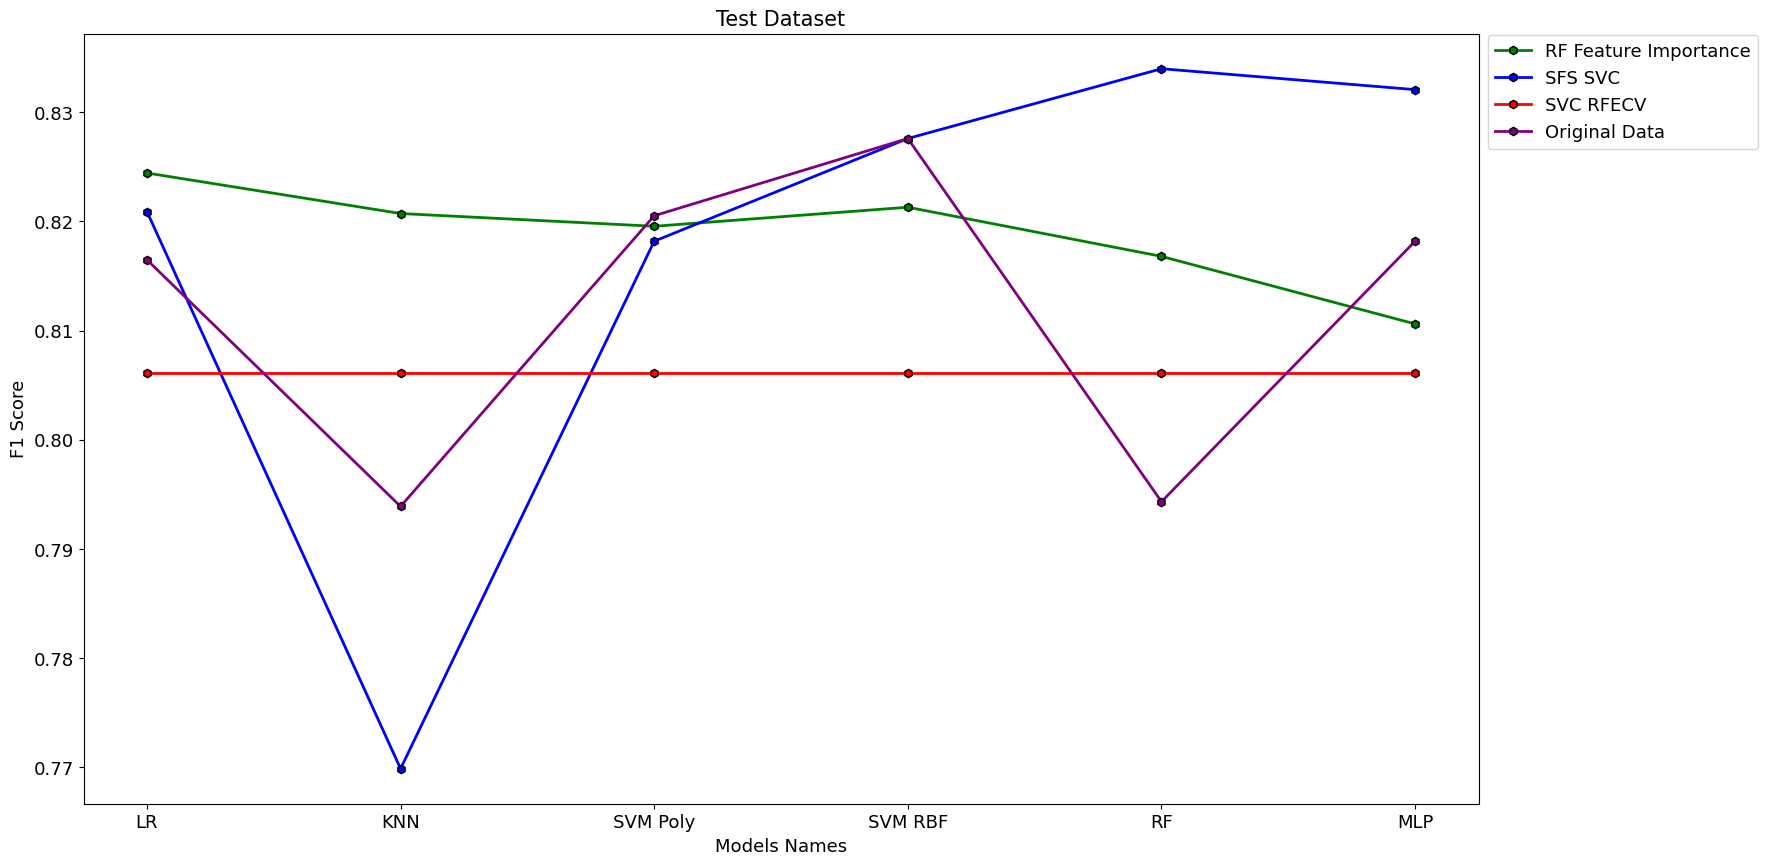

In [449]:
##Plot

#Make Color
lotsa_colors = colors.get_named_colors_mapping()
colors_chosen = ['green' , 'blue' , 'red' ,'purple' ]
colors_plot = []
for cname in colors_chosen:
    colors_plot.append(lotsa_colors[cname])
    

# Figure

fig = plt.figure(figsize=(18,10) , dpi=100)

plt.title('Test Dataset' ,  fontsize = 15)

plt.xlabel('Models Names' ,  fontsize = 13)
plt.ylabel('F1 Score' ,  fontsize = 13)

Data_Selection_Method_Names = ['RF Feature Importance', 'SFS SVC' ,'SVC RFECV', 'Original Data']

for j,i in enumerate(Data_Selection_Method_Names):
    ind = Information_df.loc[Information_df['Name'] == i]
    plt.plot(['LR','KNN','SVM Poly','SVM RBF','RF','MLP'], ind[['Test f1-Score LR','Test f1-Score KNN',
                                                                  'Test f1-Score SVM Poly','Test f1-Score SVM RBF',
                                                                  'Test f1-Score RF', 'Test f1-Score MLP-NN']].values.flatten(),
                 color = colors_plot[j] , marker = 'h', mec = 'k', 
         label=str(i), linewidth= 2)
    
    
plt.legend(bbox_to_anchor = (1, 1.01))
plt.rcParams.update({'font.size': 13})
plt.show()